# Assignment 3. Machine Learning and Graph Analysis

**Foundations of Data Science**  
*Dr. Khalaj (Fall 2024)*  


In [ ]:
Name = "Leili Motahari"
Student_id = ''

##  **Part 1 : Supervised and Unsupervised learning**

### 1. Supervised Learning

In this section, you will work with the IMDB dataset. You can download the dataset using the provided [link](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews/code).

The task involves classifying comments into two categories: positive and negative.


#### Naive Bayes

Write a Naive Bayes classifier class and complete the implementation of its functions.

10 Points

In [23]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split



class NaiveBayes():
    def __init__(self, count_vectorizer, alpha=1):
        super().__init__()
        self.cv = count_vectorizer
        self.num_classes = None
        self.classes = None
        self.number_of_features = None
        self.number_of_samples = None
        self.prior = None
        self.feature_probabilities = None
        self.log_probs = None
        self.alpha = alpha

    def fit(self, x, y):
        """
        Fit the features and the labels
        Calculate prior and feature probabilities

        Parameters
        ----------
        x: np.ndarray
            An m * n matrix - m is count of docs and n is embedding size

        y: np.ndarray
            The real class label for each doc

        Returns
        -------
        self
            Returns self as a classifier
        """

        self.classes = np.unique(y)
        print('classes' , self.classes) # [0 , 1]
        self.num_classes = len(self.classes)
        print('num_classes' , self.num_classes)
        self.number_of_samples, self.number_of_features = x.shape
        print('number of features' , self.number_of_features , 'numebr of samples' , self.number_of_samples)

       
        self.prior = np.zeros(self.num_classes)
        self.feature_probabilities = np.zeros((self.num_classes, self.number_of_features))
        print('feature prob' , self.feature_probabilities)

        for idx, cls in enumerate(self.classes):
            x_cls = x[y == cls]
            self.prior[idx] = x_cls.shape[0] / self.number_of_samples
            print('prior' , self.prior)
            word_counts = np.sum(x_cls, axis=0) 
            self.feature_probabilities[idx, :] = (word_counts + self.alpha) / \
                                                 (np.sum(word_counts) + self.alpha * self.number_of_features)

        self.log_probs = np.log(self.feature_probabilities)
        print('log probs' , self.log_probs)

        return self


    def predict(self, x):
        """
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count of docs and n is embedding size
        Returns
        -------
        np.ndarray
            Return the predicted class for each doc
            with the highest probability (argmax)
        """
        log_posteriors = np.zeros((x.shape[0], self.num_classes))  

        for idx, cls in enumerate(self.classes):
           
            log_posteriors[:, idx] = (
                np.log(self.prior[idx]) +  
                x @ self.log_probs[idx, :].T  #using dot for easier computing
            )
        return self.classes[np.argmax(log_posteriors, axis=1)]

    def prediction_report(self, x, y):
        """
        Parameters
        ----------
        x: np.ndarray
            An k * n matrix - k is count of docs and n is embedding size
        y: np.ndarray
            The real class label for each doc
        Returns
        -------
        str
            Return the classification report
        """
        predictions = self.predict(x)
        report = classification_report(y, predictions, target_names=[str(cls) for cls in self.classes])

        return report

    def get_percent_of_positive_reviews(self, sentences):
        embeddings = self.cv.transform(sentences).toarray()
        predictions = self.predict(embeddings)

        # Calculate the percentage of positive reviews (class = 1)
        percent_positive = (np.sum(predictions == 1) / len(sentences)) * 100
        return percent_positive

    def load_data(self,file_path):
        """
        Load the data from the csv file and preprocess the text. Then save the normalized tokens and the sentiment labels.
        """
        import pandas as pd
        data = pd.read_csv(file_path)
        data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})

        data['review'] = data['review'].str.lower()
        data['review'] = data['review'].str.replace(r'[^\w\s]', '', regex=True)

        reviews = data['review'].values
        sentiments = data['sentiment'].values

        return reviews, sentiments


    def split_data(self, test_data_ratio=0.2):
        """
        Split the data into training and testing data.

        Parameters
        ----------
        test_data_ratio: float
            The ratio of the test data
        Returns
        -------
        np.ndarray, np.ndarray, np.ndarray, np.ndarray
            Return the training and testing data for the embeddings and the sentiments.
            in the order of x_train, x_test, y_train, y_test
        """
        if not hasattr(self, 'reviews') or not hasattr(self, 'sentiments'):
            raise AttributeError("Data has not been loaded. Please call the 'load_data' method first.")

        x_train, x_test, y_train, y_test = train_test_split(
            self.reviews, self.sentiments, test_size=test_data_ratio, random_state=42
        )

        return x_train, x_test, y_train, y_test
    


if __name__ == '__main__':
    """
    First, find the embeddings of the reviews using the CountVectorizer, then fit the model with the training data.
    Finally, predict the test data and print the classification report.
    """
    file_path = r"C:\Users\Asus\Downloads\HW_3_data_science\IMDB Dataset.csv" 
 
    nb_classifier = NaiveBayes(count_vectorizer=CountVectorizer(max_features=5000), alpha=1)
    reviews, sentiments = nb_classifier.load_data(file_path)
    nb_classifier.reviews = reviews
    nb_classifier.sentiments = sentiments
    x_train_text, x_test_text, y_train, y_test = nb_classifier.split_data(test_data_ratio=0.2)
    count_vectorizer = CountVectorizer(max_features=5000)
    x_train = count_vectorizer.fit_transform(x_train_text).toarray()
    x_test = count_vectorizer.transform(x_test_text).toarray()
    nb_classifier.cv = count_vectorizer
    nb_classifier.fit(x_train, y_train)
    predictions = nb_classifier.predict(x_test)
    report = nb_classifier.prediction_report(x_test, y_test)
    print("Classification Report:")
    print(report)



classes [0 1]
num_classes 2
number of features 5000 numebr of samples 40000
feature prob [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
prior [0.500975 0.      ]
prior [0.500975 0.499025]
log probs [[ -7.70810091  -9.33192756 -11.56455407 ...  -8.69236463  -8.91207372
  -10.6321772 ]
 [ -7.76438477  -9.39206027  -9.27087471 ...  -9.77628026 -10.24448371
  -10.46942745]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      4961
           1       0.85      0.83      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



Naïve Bayes Model Performance
Accuracy: 84%
The model correctly classifies 84% of the test samples.
This is a decent accuracy for a Naïve Bayes classifier on text data.

Class 0 (Negative Sentiment)
Precision: 0.83 (83% of predicted negatives were correct).
Recall: 0.85 (85% of actual negatives were correctly identified).
Class 1 (Positive Sentiment)
Precision: 0.85 (85% of predicted positives were correct).
Recall: 0.83 (83% of actual positives were correctly identified).
Balanced Performance: The scores are similar, meaning the model doesn't favor one class significantly.

F1-score (0.84 for both classes)
The F1-score is a balance between precision and recall, showing good consistency across classes.

#### SVM
Write an SVM classifier to perform classification on the IMDB dataset.

10 Points

SVM works by finding the best boundary (hyperplane) that separates different classes in the data. It aims to maximize the margin between the nearest points of different classes, known as support vectors.

In [1]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC  # Using LinearSVC instead of SVC for faster computing and effiency
from sklearn.metrics import classification_report
import pandas as pd


file_path = r"C:\Users\Asus\Downloads\HW_3_data_science\IMDB Dataset.csv"
data = pd.read_csv(file_path)


# Map sentiment to 0 and 1
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})
data['review'] = data['review'].str.lower().str.replace(r'[^\w\s]', '', regex=True)


reviews = data['review'].values
sentiments = data['sentiment'].values
x_train_text, x_test_text, y_train, y_test = train_test_split(
    reviews, sentiments, test_size=0.2, random_state=42
)

#subset :
# x_train_text = x_train_text[:10000]
# y_train = y_train[:10000]

vectorizer = CountVectorizer(max_features=5000)
x_train = vectorizer.fit_transform(x_train_text)  
x_test = vectorizer.transform(x_test_text)

svm_classifier = LinearSVC(C=1, max_iter=10000)  
svm_classifier.fit(x_train, y_train)

y_pred = svm_classifier.predict(x_test)
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:")
print(report)


Classification Report:
              precision    recall  f1-score   support

    Negative       0.87      0.86      0.87      4961
    Positive       0.87      0.88      0.87      5039

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



A score of 87% suggests that the model has learned useful patterns from the data.

Negative Sentiment (0.87) → 87% of the predicted negative reviews were correct.

Positive Sentiment (0.87) → 87% of the predicted positive reviews were correct.

Negative Sentiment (0.86) → The model correctly identifies 86% of actual negative reviews.

Positive Sentiment (0.88) → The model correctly identifies 88% of actual positive reviews.

F1-score (0.87 for both classes) → This confirms that the model is balanced in terms of precision and recall..

Since both classes have similar F1-scores, there is no class imbalance issue.

#### KNN
Write an KNN classifier to perform classification on the IMDB dataset.

10 Points

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import pandas as pd

file_path = r"C:\Users\Asus\Downloads\HW_3_data_science\IMDB Dataset.csv"
data = pd.read_csv(file_path)
data['sentiment'] = data['sentiment'].map({'positive': 1, 'negative': 0})  
data['review'] = data['review'].str.lower() 
data['review'] = data['review'].str.replace(r'[^\w\s]', '', regex=True) 
reviews = data['review'].values
sentiments = data['sentiment'].values
x_train_text, x_test_text, y_train, y_test = train_test_split(reviews, sentiments, test_size=0.2, random_state=42)


vectorizer = CountVectorizer(max_features=10000)  
x_train = vectorizer.fit_transform(x_train_text).toarray()
x_test = vectorizer.transform(x_test_text).toarray()

knn_classifier = KNeighborsClassifier(n_neighbors=20, metric='cosine')  
knn_classifier.fit(x_train, y_train)

 
y_pred = knn_classifier.predict(x_test)
report = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])
print("Classification Report:")
print(report)


#I increased the max_feautures from 5000 to 1000 and n_neighbors to better accuracy

Classification Report:
              precision    recall  f1-score   support

    Negative       0.69      0.63      0.66      4961
    Positive       0.66      0.72      0.69      5039

    accuracy                           0.68     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.68      0.67     10000



The model correctly classifies 68% of test samples.

This is below optimal for a text classification task.

KNN is not ideal for high-dimensional text data.

Negative Sentiment (0.69) → 69% of predicted negative reviews were actually negative.

Positive Sentiment (0.66) → 66% of predicted positive reviews were actually positive.

Precision is not balanced between classes.

The model is slightly better at predicting negative reviews than positive ones.

Negative Sentiment (0.63) → Only 63% of actual negative reviews were correctly predicted.

Positive Sentiment (0.72) → 72% of actual positive reviews were correctly predicted.

Higher recall for Positive Sentiment (0.72) means the model is favoring positive reviews and misclassifying more negatives as positives.

F1-score (0.67 for both classes) → Balance between precision and recall.

Since both classes have similar F1-scores, the model is not heavily imbalanced, but overall performance is weak.

### 2. Unsupervised Learning

In this section, you will work with the *Breast Cancer* and *Fruit* datasets provided by `scikit-learn`.

#### Loading Breast Cancer and Fruit datasets


In [6]:
# %matplotlib notebook
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

fruit_data = pd.read_csv("fruit_data_with_colors.txt", delimiter="\t")

# print(fruit_data.head())
cancer = load_breast_cancer()
cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
print(cancer_df.head())

   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst radius  worst texture  worst perimeter  \
0           

### Dimensionality Reduction and Manifold Learning

#### PCA on Breast Cancer Dataset

Use PCA to find the **2** principal components of the Breast Cancer Dataset.

5 Points

Dimensionality Reduction:
PCA reduces the number of features in your dataset by creating new variables (principal components) that are linear combinations of the original features. These new variables are uncorrelated and ordered such that the first principal component (PC1) accounts for the largest possible variance, the second (PC2) accounts for the next highest variance, and so on.

How Does PCA Work?

Standardization: PCA is sensitive to the scale of the features, so data is usually standardized (mean = 0, variance = 1).
Covariance Matrix Computation: PCA computes the covariance matrix of the features.
Eigen Decomposition: It then finds the eigenvalues and eigenvectors of this covariance matrix.
Projection: The eigenvectors (principal components) are sorted by their corresponding eigenvalues (variance). The data is projected onto these eigenvectors to form the new reduced dataset.




In [7]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

cancer_df['target'] = cancer.target
features = cancer.feature_names
x = cancer_df.loc[:, features].values
y = cancer_df['target'].values

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_scaled)
principal_cancer_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_cancer_df = pd.concat([principal_cancer_df, cancer_df[['target']]], axis=1)
print("\n rows of the PCA-transformed data:")
print(final_cancer_df.head(20))

# This shows how much variance is captured by each of the principal components
print("\nExplained Variance Ratio for the 2 principal components:")
print(pca.explained_variance_ratio_)



 rows of the PCA-transformed data:
         PC1        PC2  target
0   9.192837   1.948583       0
1   2.387802  -3.768172       0
2   5.733896  -1.075174       0
3   7.122953  10.275589       0
4   3.935302  -1.948072       0
5   2.380247   3.949929       0
6   2.238883  -2.690031       0
7   2.143299   2.340244       0
8   3.174924   3.391813       0
9   6.351747   7.727174       0
10 -0.810414  -2.659275       0
11  2.651100   0.066568       0
12  8.185034   2.700976       0
13  0.342126  -0.968279       0
14  4.342379   4.861083       0
15  4.075656   2.977061       0
16  0.230055  -1.564758       0
17  4.418011   1.418670       0
18  4.948704  -4.114334       0
19 -1.237063  -0.188215       1

Explained Variance Ratio for the 2 principal components:
[0.44272026 0.18971182]


#### Plotting
Plot the PCA-transformed version of the Breast Cancer Dataset

5 Points

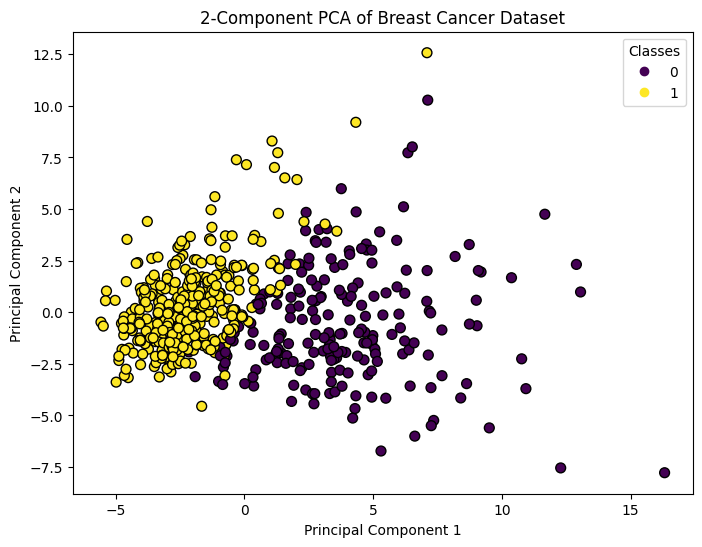

In [5]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(final_cancer_df['PC1'], final_cancer_df['PC2'], c=final_cancer_df['target'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2-Component PCA of Breast Cancer Dataset')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

Benign tumors (yellow) are mostly clustered together in the left region.
Malignant tumors (purple) are more spread out across the right.
This indicates that PCA effectively captures variance in the dataset.
The x-axis (PC1) shows better separation between benign and malignant samples.
Some purple and yellow points overlap near the center.

Plot the magnitude of each feature value for the first two principal components. This mean you will have to plot the contribution of each feature in the original dataset, to each PCA component.

5 Points

PCA Loadings (Coefficients):
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
PC1     0.218902      0.103725        0.227537   0.220995         0.142590   
PC2    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
PC1          0.239285        0.258400             0.260854       0.138167   
PC2          0.151892        0.060165            -0.034768       0.190349   

     mean fractal dimension  ...  worst radius  worst texture  \
PC1                0.064363  ...      0.227997       0.104469   
PC2                0.366575  ...     -0.219866      -0.045467   

     worst perimeter  worst area  worst smoothness  worst compactness  \
PC1         0.236640    0.224871          0.127953           0.210096   
PC2        -0.199878   -0.219352          0.172304           0.143593   

     worst concavity  worst concave points  worst symmetry  \
PC1         0.228768      

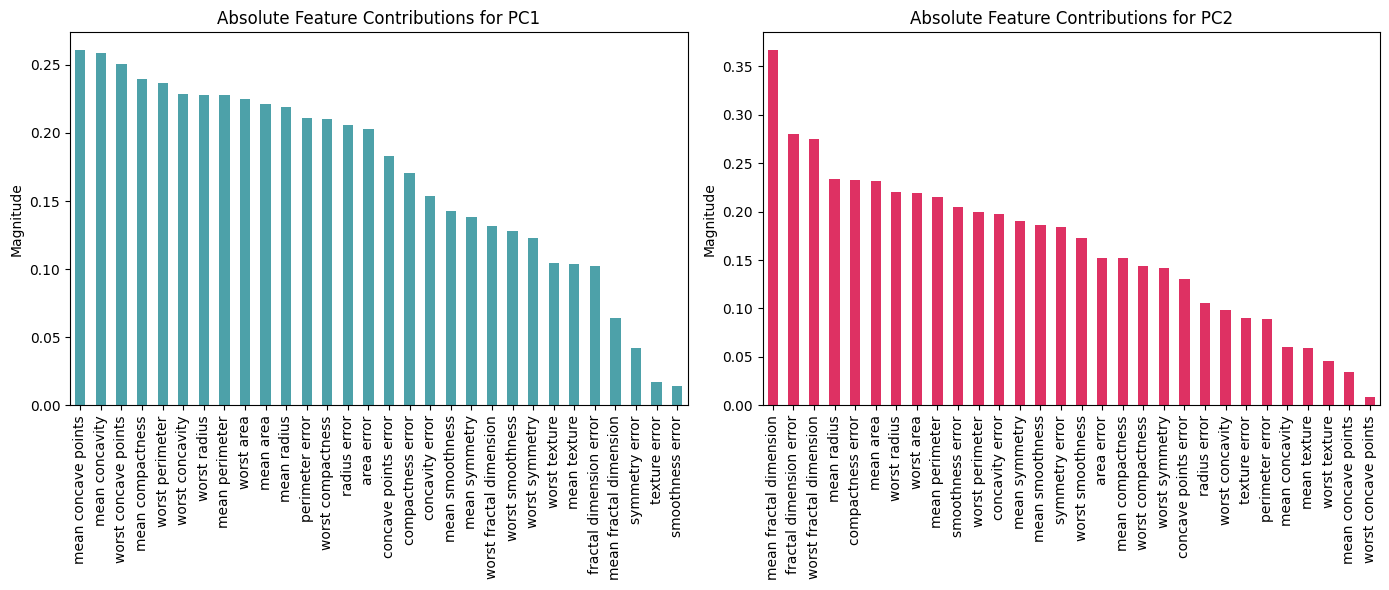

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


cancer = load_breast_cancer()
features = cancer.feature_names
data = cancer.data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
pca = PCA(n_components=2)
pca.fit(data_scaled)

components_df = pd.DataFrame(pca.components_, columns=features, index=['PC1', 'PC2'])
print("PCA Loadings (Coefficients):")
print(components_df)

#Plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

#PC1
components_df.loc['PC1'].abs().sort_values(ascending=False).plot(kind='bar', ax=axes[0] , color= '#4DA1A9')
axes[0].set_title('Absolute Feature Contributions for PC1')
axes[0].set_ylabel('Magnitude')

#PC2
components_df.loc['PC2'].abs().sort_values(ascending=False).plot(kind='bar', ax=axes[1], color='#DE3163')
axes[1].set_title('Absolute Feature Contributions for PC2')
axes[1].set_ylabel('Magnitude')

plt.tight_layout()
plt.show()


#### PCA on the Fruit Dataset

Use PCA to find the **2** principal components of the Fruit dataset.

5 Points

    fruit_label       PC1       PC2
0             1  1.572169 -1.980044
1             1  0.878417 -1.579373
2             1  0.529773 -1.732891
3             2 -2.712610  0.414674
4             2 -2.893412  0.242003
5             2 -3.149072 -0.022745
6             2 -3.164350  0.489799
7             2 -3.391970  0.497052
8             1 -0.133784  1.922511
9             1 -0.217835  1.776012
10            1 -0.619840  2.025282
11            1 -0.276235  1.936379
12            1 -0.651533  1.447761
13            1  0.287902 -0.693009
14            1  0.238737 -0.691171
15            1  0.282477 -0.610029
16            1  0.401540 -0.952746
17            1  0.374798 -0.237274
18            1 -0.094575  1.032345
19            1 -0.172477  1.223752


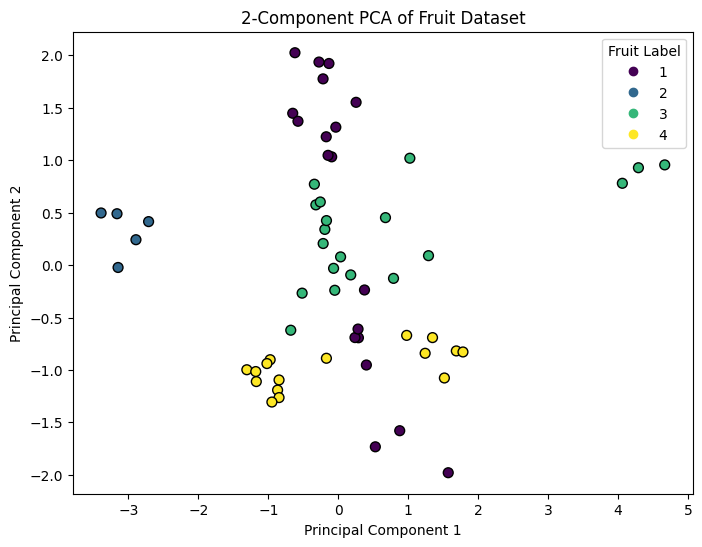

In [16]:
#numeric features for PCA
features = ['mass', 'width', 'height', 'color_score']
X = fruit_data[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
final_df = pd.concat([fruit_data[['fruit_label']], principal_df], axis=1)


print(final_df.head(20))

#Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(final_df['PC1'], final_df['PC2'],
                      c=final_df['fruit_label'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2-Component PCA of Fruit Dataset')
plt.legend(*scatter.legend_elements(), title="Fruit Label")
plt.show()

Some Clusters Are Clearly Separated

The blue group (Label 2) is well-separated on the left.
The yellow group (Label 4) forms a cluster in the lower region.
The green group (Label 3) and purple group (Label 1) are somewhat mixed.
The x-axis (PC1) shows stronger class separations than PC2.

#### Manifold learning methods

Multidimensional scaling (MDS) seeks a low-dimensional representation of the data in which the distances respect well the distances in the original high-dimensional space.
In general, MDS is a technique used for analyzing similarity or dissimilarity data. It attempts to model similarity or dissimilarity data as distances in a geometric spaces. The data can be ratings of similarity between objects, interaction frequencies of molecules, or trade indices between countries.

#####  Multidimensional scaling (MDS) on the Fruit dataset

    Perform Multidimensional scaling (MDS) on the Fruit dataset.

5 Points

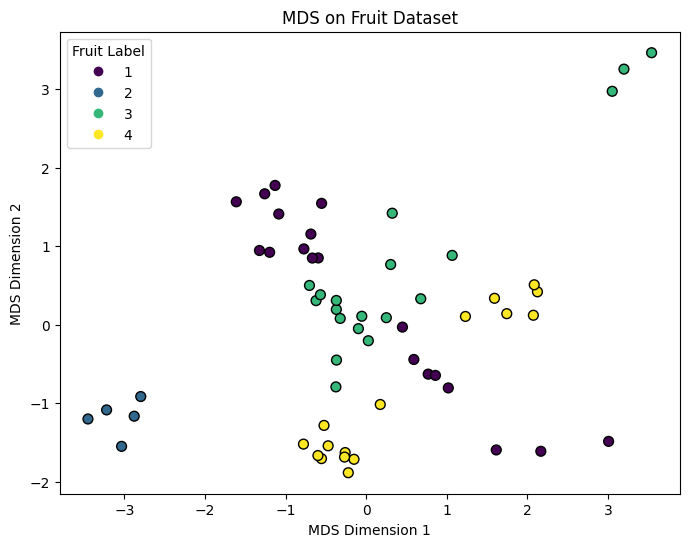

In [17]:
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import pandas as pd


mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)
mds_df = pd.DataFrame(X_mds, columns=['Dim1', 'Dim2'])
mds_df['fruit_label'] = fruit_data['fruit_label']

#Plot 
plt.figure(figsize=(8, 6))
scatter = plt.scatter(mds_df['Dim1'], mds_df['Dim2'],
                      c=mds_df['fruit_label'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS on Fruit Dataset')
plt.legend(*scatter.legend_elements(), title="Fruit Label")
plt.show()


lue group (Label 2) is isolated on the left, meaning those fruits have unique characteristics.
Yellow group (Label 4) forms a cluster in the lower central region, indicating some common features.
Green (Label 3) and Purple (Label 1) are spread out, with some overlap.


##### Multidimensional scaling (MDS) on the Breast Cancer dataset

Perform Multidimensional scaling (MDS) on the Breast Cancer dataset.

5 Points

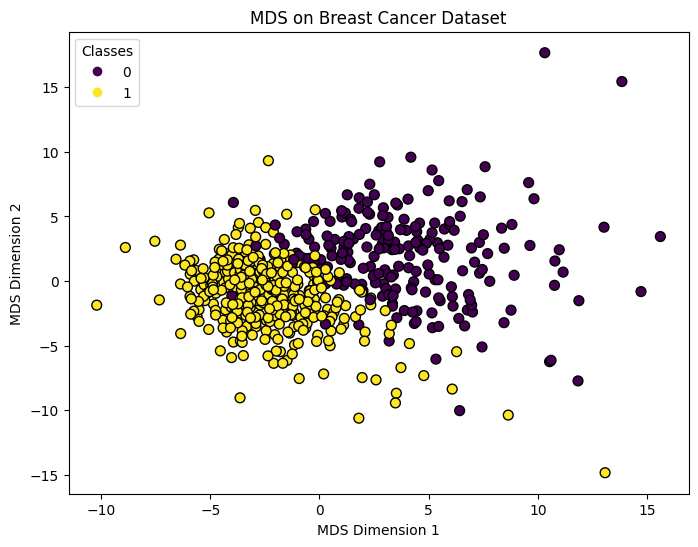

In [18]:
X = cancer.data      
y = cancer.target 

# MDS is sensitive to the scale of the data, so we standardize to ensure each feature contributes equally.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X_scaled)

#Plot
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_mds[:, 0], X_mds[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.title('MDS on Breast Cancer Dataset')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()

##### t-SNE on the Fruit Dataset

t-SNE ([`TSNE`](https://scikit-learn.org/1.5/modules/generated/sklearn.manifold.TSNE.html#sklearn.manifold.TSNE)) converts affinities of data points to probabilities. The affinities in the original space are represented by Gaussian joint probabilities and the affinities in the embedded space are represented by Student’s t-distributions. This allows t-SNE to be particularly sensitive to local structure and has a few other advantages over existing techniques:

* Revealing the structure at many scales on a single map

* Revealing data that lie in multiple, different, manifolds or clusters

* Reducing the tendency to crowd points together at the center

t-SNE will focus on the local structure of the data and will tend to extract clustered local groups of samples as highlighted on the S-curve example. This ability to group samples based on the local structure might be beneficial to visually disentangle a dataset that comprises several manifolds at once as is the case in the digits dataset.

The Kullback-Leibler (KL) divergence of the joint probabilities in the original space and the embedded space will be minimized by gradient descent. Note that the KL divergence is not convex, i.e. multiple restarts with different initializations will end up in local minima of the KL divergence. Hence, it is sometimes useful to try different seeds and select the embedding with the lowest KL divergence.

The disadvantages to using t-SNE are roughly:

1. t-SNE is computationally expensive, and can take several hours on million-sample datasets where PCA will finish in seconds or minutes

2. The Barnes-Hut t-SNE method is limited to two or three dimensional embeddings.

3. The algorithm is stochastic and multiple restarts with different seeds can yield different embeddings. However, it is perfectly legitimate to pick the embedding with the least error.

4. Global structure is not explicitly preserved. This problem is mitigated by initializing points with PCA (using `init='pca'`).

Perform t-SNE on the Fruit dataset.

5 Points

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


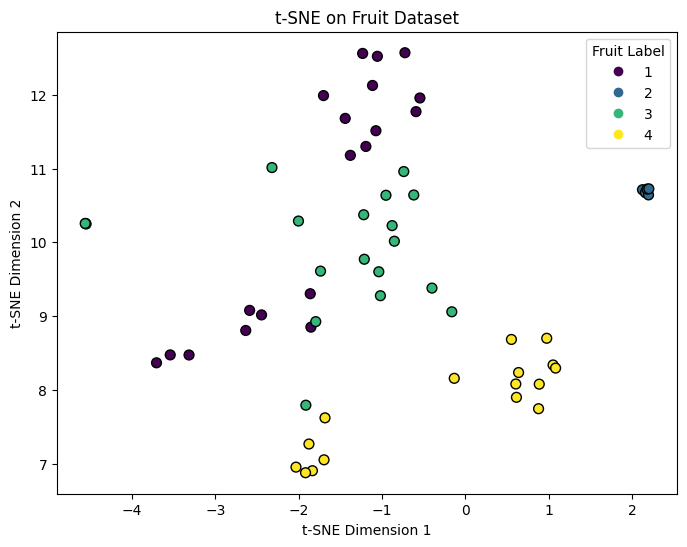

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler


fruit_data = pd.read_csv("fruit_data_with_colors.txt", delimiter="\t")
fruit_data.dropna(inplace=True)  
features = ['mass', 'width', 'height', 'color_score']
X = fruit_data[features].values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
tsne = TSNE(n_components=2, init='pca', random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dim1', 'Dim2'])
tsne_df['fruit_label'] = fruit_data['fruit_label']

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_df['Dim1'], tsne_df['Dim2'], 
                      c=tsne_df['fruit_label'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE on Fruit Dataset')
plt.legend(*scatter.legend_elements(), title="Fruit Label")
plt.show()


t-SNE Has Created Meaningful Clusters

Yellow group (Label 4) is well-clustered in the lower-right region.
Blue group (Label 2) is clearly separated on the far right.
Purple (Label 1) and Green (Label 3) are somewhat spread out but still form distinct clusters.
Better Non-Linear Separation Than PCA/MDS
Unlike PCA and MDS, t-SNE does not assume linear separability.

##### t-SNE on the Breast Cancer dataset

Perform t-SNE on the Breast Cancer dataset.

5 Points

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


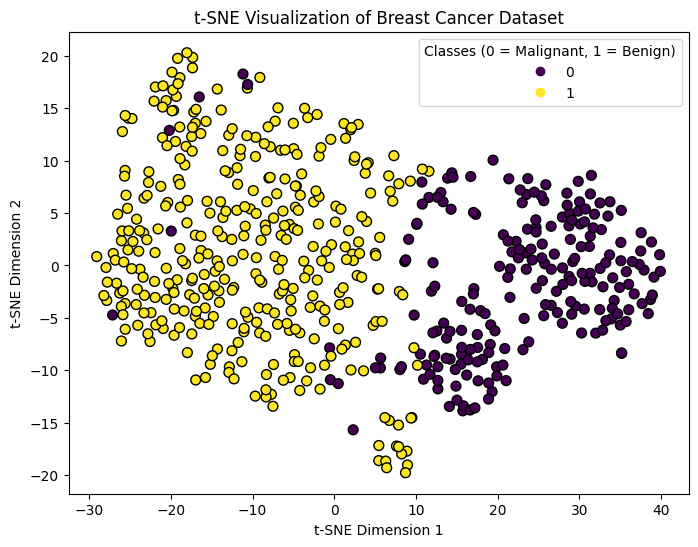

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

cancer = load_breast_cancer()
X = cancer.data  
y = cancer.target  

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  
tsne = TSNE(n_components=2, init='pca', random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
tsne_df = pd.DataFrame(data=X_tsne, columns=['Dim1', 'Dim2'])
tsne_df['target'] = y  

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tsne_df['Dim1'], tsne_df['Dim2'], 
                      c=tsne_df['target'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Breast Cancer Dataset')
plt.legend(*scatter.legend_elements(), title="Classes (0 = Malignant, 1 = Benign)")
plt.show()


t-SNE Has Created Well-Separated Clusters

Malignant (Purple) and Benign (Yellow) tumors are mostly separated into two distinct clusters.
The separation indicates that the features used in the dataset contain enough information to distinguish between malignant and benign cases.
A few yellow (benign) points are mixed into the malignant region, and vice versa.
Unlike PCA, t-SNE does not assume linearity, making it better for capturing complex relationships in high-dimensional data.

## **Part 2 : Graph Analysis**

##  Zachary's Karate Club
Perhaps the most famous benchmark graph is Zachary's Karate Club. It contains 34 nodes, representing members of a karate club whose interactions were monitored over a period of three years by researchers. Links in this graph connect individuals interacting outside club activities, a proxy for social ties.

During the course of the study, a conflict between the instructor Mr. Hi (node 0) and the president, or Officer (node 33) led to a split of the club into separate groups led by Mr. Hi and Officer. In this case we know whom each member of the group followed after the split, providing empirical community labels: those members who followed Mr. Hi are said to be one community and those following the Officer make up the other.

For this graph, we assume that the post-split group composition was largely driven by the social ties: members of the same friend groups would want to be part of the same club after the split. We thus expect a good community-detection algorithm to predict the post-split group composition with high accuracy.

Zachary's karate club is such a popular benchmark graph that it has its own function in NetworkX:

 Draw the karate club with `networkx`.

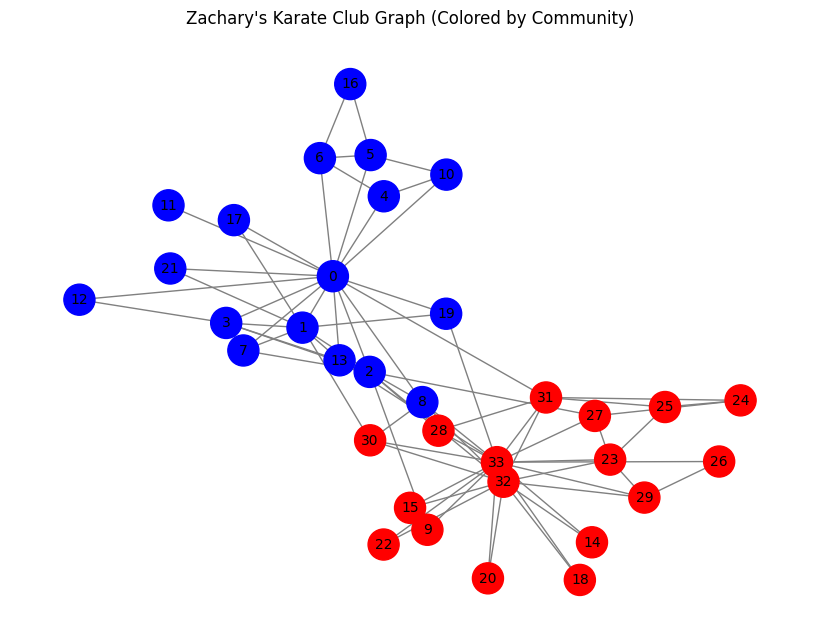

In [16]:
import networkx as nx
import matplotlib.pyplot as plt


G = nx.karate_club_graph()
node_colors = ['blue' if G.nodes[node]['club'] == 'Mr. Hi' else 'red' for node in G.nodes]

#Plot
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Position nodes using the spring layout
nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color='gray', node_size=500, font_size=10)
plt.title("Zachary's Karate Club Graph (Colored by Community)")
plt.show()


## 1. Agglomerative Method: Hierarchical Clustering
In this method, we start with a **distance matrix** $D$, which is a matrix that provides the distance between two nodes $i$ and $j$ in network $G$. Using $D$, we then perform [hierarchical clustering](http://docs.scipy.org/doc/scipy-0.17.0/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy) in a recursive manner, group _similar_ nodes at each step. There are various ways to perform the similarity grouping using _agglomerative procedures_ such as **single**, **complete**, and **average**, to name a few. In this section, we implement the [average/UPGMA linkage](http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.cluster.hierarchy.average.html#scipy.cluster.hierarchy.average).

Perform **Hierarchical clustering** and visualize the **order** in which the nodes are grouped together in communities.

10 Points


archical Clustering
In this method, we start with a **distance matrix** $D$, which is a matrix that provides the distance between two nodes $i$ and $j$ in network $G$. Using $D$, we then perform [hierarchical clustering](http://docs.scipy.org/doc/scipy-0.17.0/reference/cluster.hierarchy.html#module-scipy.cluster.hierarchy) in a recursive manner, group _similar_ nodes at each step. There are various ways to perform the similarity grouping using _agglomerative procedures_ such as **single**, **complete**, and **average**, to name a few. In this section, we implement the [average/UPGMA linkage](http://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.cluster.hierarchy.average.html#scipy.cluster.hierarchy.average).

Perform **Hierarchical clustering** and visualize the **order** in which the nodes are grouped together in communities.

10 Points


### Hierarchichal Clustering (5 Points)

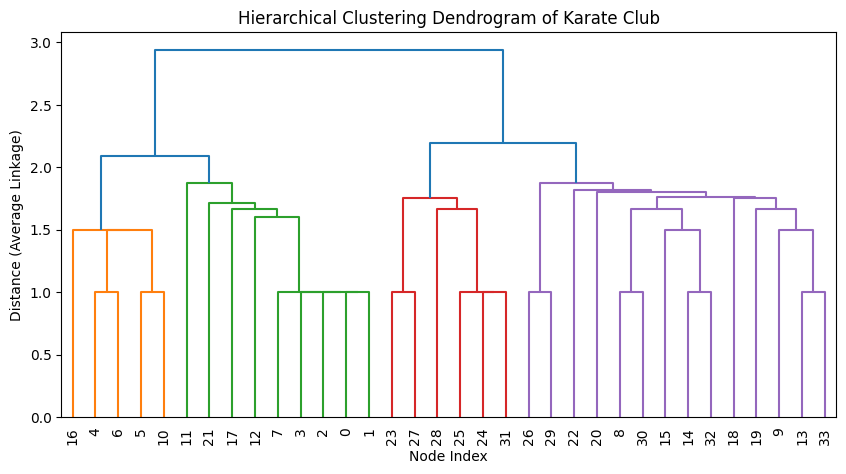

In [18]:
import networkx as nx
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

G = nx.karate_club_graph()
N = len(G.nodes)  
distance_matrix = np.zeros((N, N))  


for i in range(N):
    for j in range(N):
        if i != j:
            try:
                distance_matrix[i, j] = nx.shortest_path_length(G, source=i, target=j)
            except nx.NetworkXNoPath:
                distance_matrix[i, j] = np.inf  


condensed_D = squareform(distance_matrix)  
Z = sch.linkage(condensed_D, method='average') 


plt.figure(figsize=(10, 5))
sch.dendrogram(Z, labels=np.arange(N), leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram of Karate Club")
plt.xlabel("Node Index")
plt.ylabel("Distance (Average Linkage)")
plt.show()


### Visualization (5 Points)

### Dendrogram
The dendrogram allows us to visualize the order in which nodes are grouped together in the clustering process.

Visualize the clustering process to show which nodes are grouped together.

5 Points

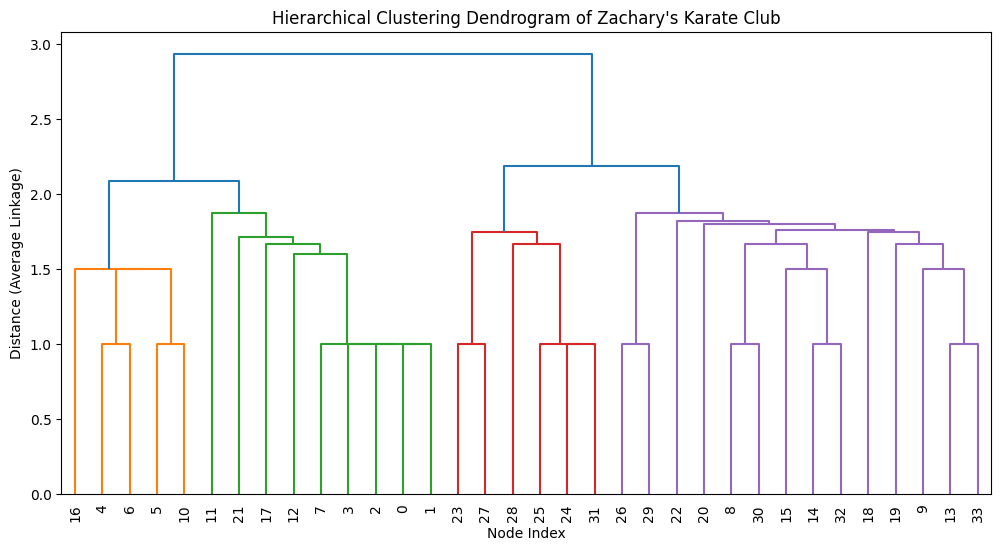

In [19]:
import networkx as nx
import numpy as np
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform



condensed_D = squareform(distance_matrix)  
Z = sch.linkage(condensed_D, method='average')  # Perform hierarchical clustering (UPGMA)

# Step 4: Plot the Dendrogram
plt.figure(figsize=(12, 6))
sch.dendrogram(Z, labels=np.arange(N), leaf_rotation=90, leaf_font_size=10)
plt.title("Hierarchical Clustering Dendrogram of Zachary's Karate Club")
plt.xlabel("Node Index")
plt.ylabel("Distance (Average Linkage)")
plt.show()


## 2. Modularity-Based Community Detection: The Louvain Method

The **community detection algorithm** that we implement in this notebook is a **modularity**-based algorithm. The **modularity** $M_c$ quantifies how good a "community" or partition is, and is given by

\begin{equation}
M_c = \sum _{c=1} ^{n_c} \left[ \frac{L_c}{L} - \left (\frac{k_c}{2L} \right)^2\right]
\end{equation}

where $n_c$ is the number of communiies, $L_c$ is the number of links within the community, $k_c$ is the total degree of nodes belonging to the community, and $L$ is the total number of links in the network. The illustration below that is taken from the slide deck shows how modularity is calculated.
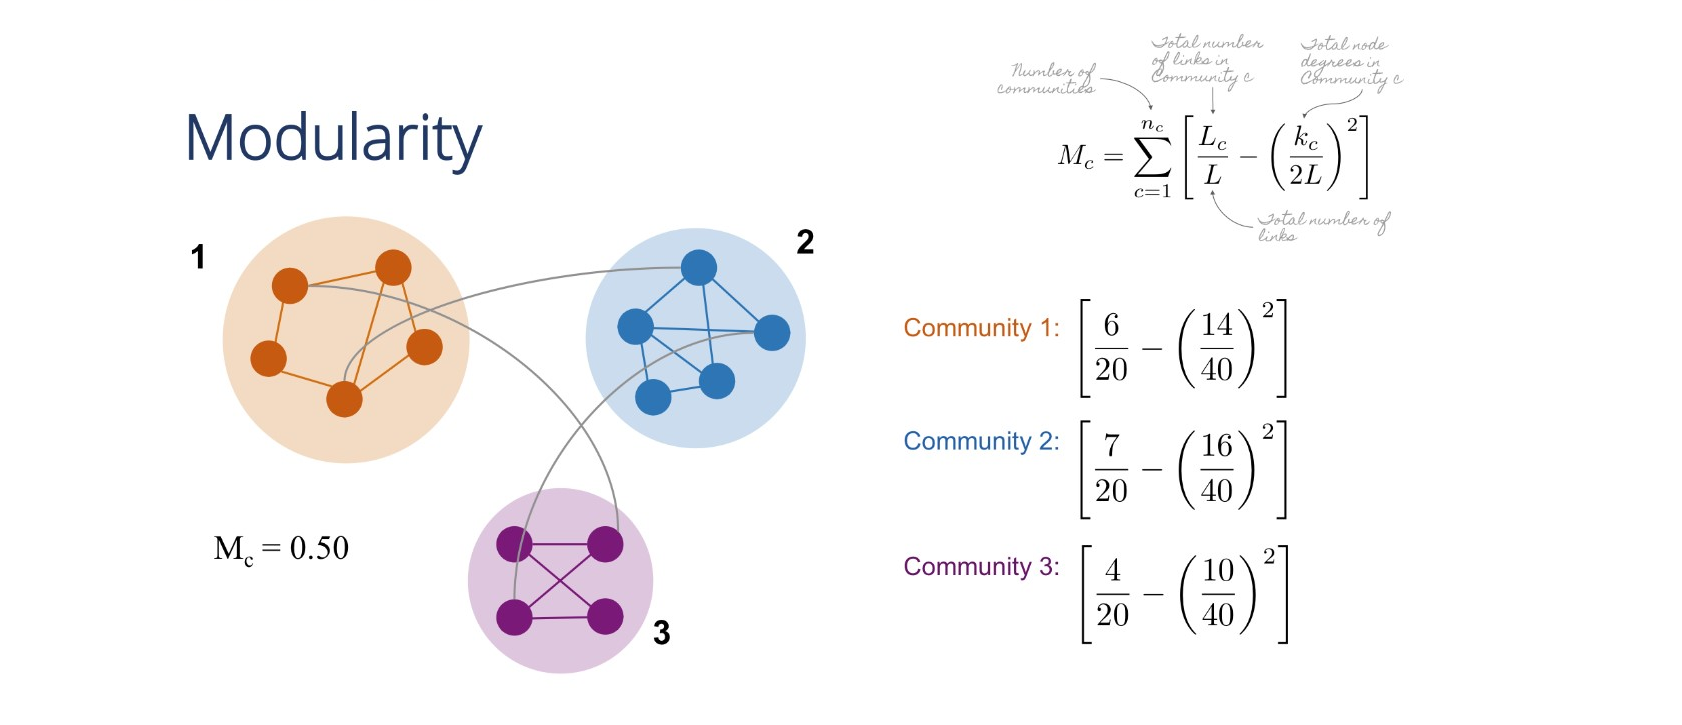

The higher the network modularity is, the more optimal the partitionioning. And, if you only have a single community, $M=0$.

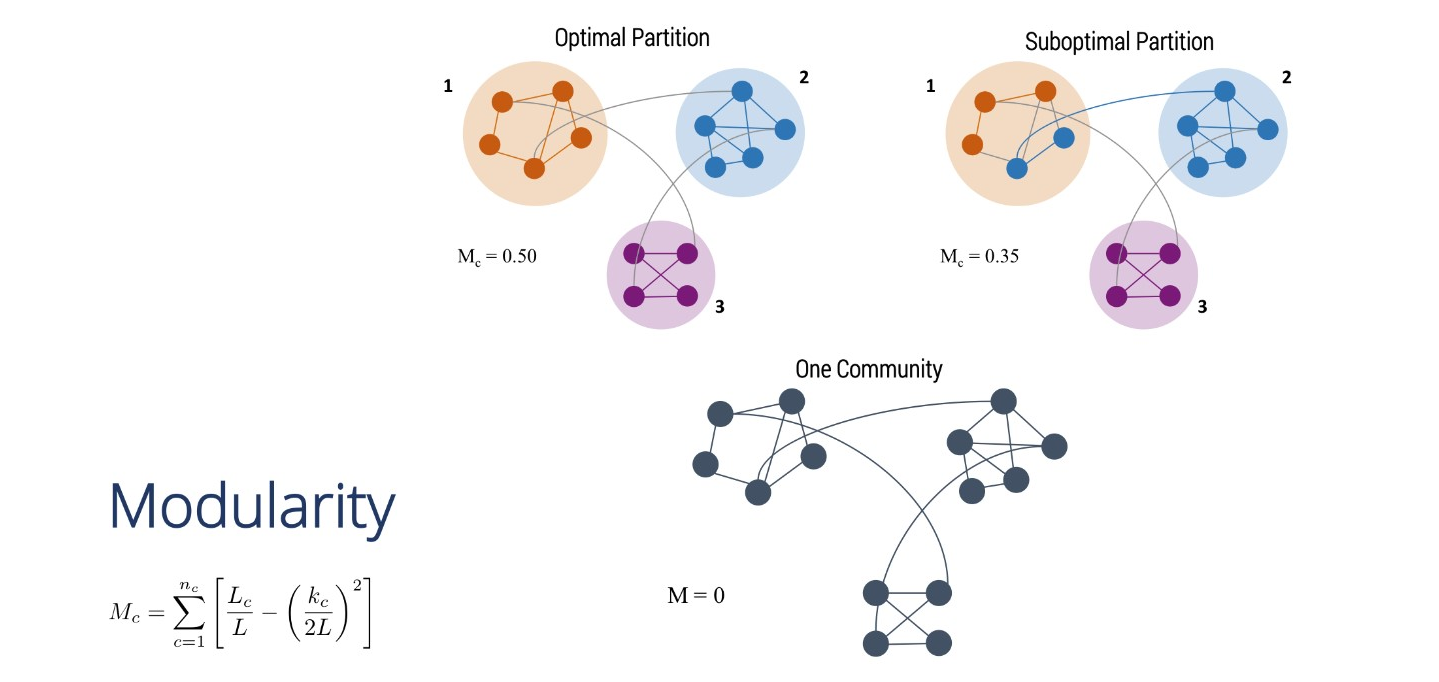

In this recipe, we implement a modularity-maximization algorithm called the Louvain algorithm. We go back to Zachary's karate club and find the best partitions.

### Best Partitions

Find the best partitions in Karate club.

5 Points

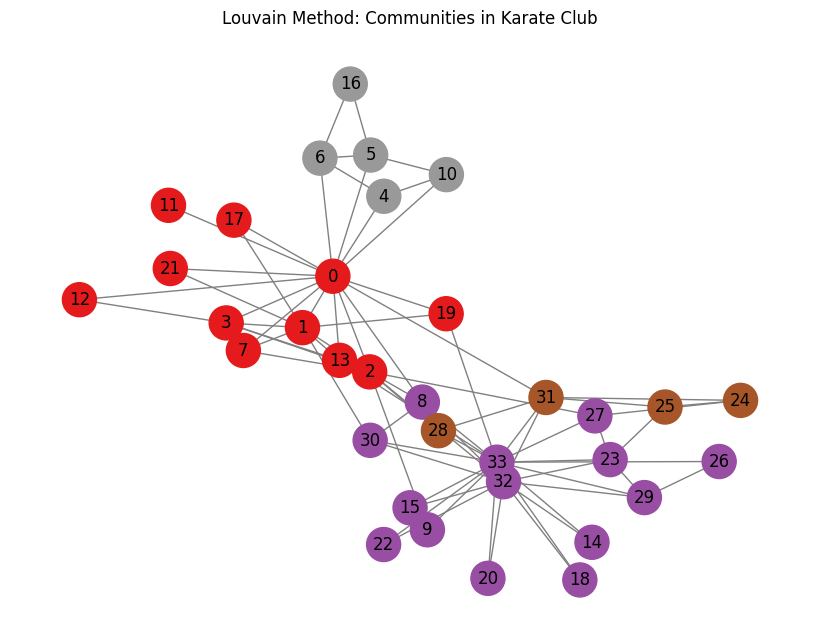

In [27]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain 


G = nx.karate_club_graph()
partition = community_louvain.best_partition(G)
colors = [partition[node] for node in G.nodes]

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  # Use spring layout for better visualization
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.Set1, node_size=600, edge_color="gray")
plt.title("Louvain Method: Communities in Karate Club")
plt.show()


Now, redraw the network; this time, highlighting the different communities by node color.

5 Points

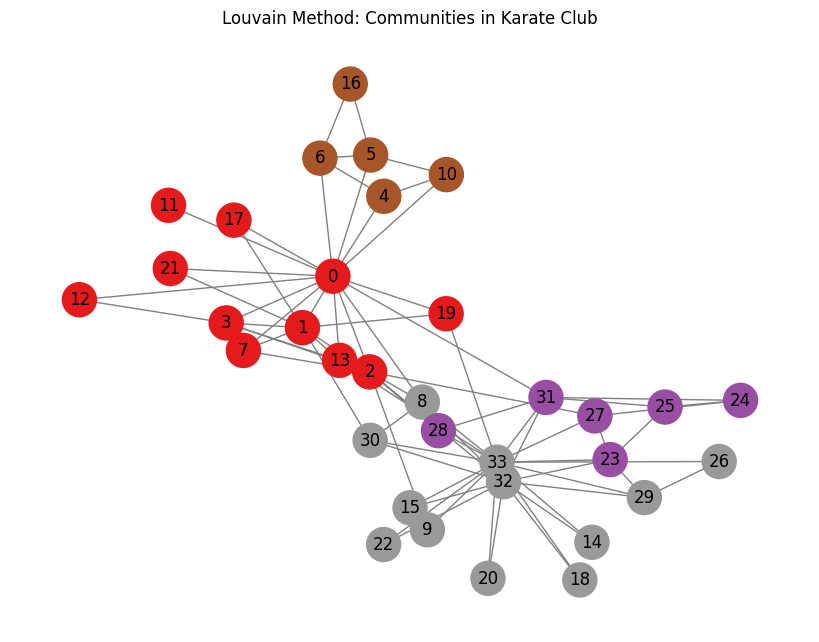

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain  


G = nx.karate_club_graph()
partition = community_louvain.best_partition(G)
colors = [partition[node] for node in G.nodes]

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_color=colors, with_labels=True, cmap=plt.cm.Set1, node_size=600, edge_color="gray")
plt.title("Louvain Method: Communities in Karate Club")
plt.show()


Now, compare this partition to the actual.

5 Points

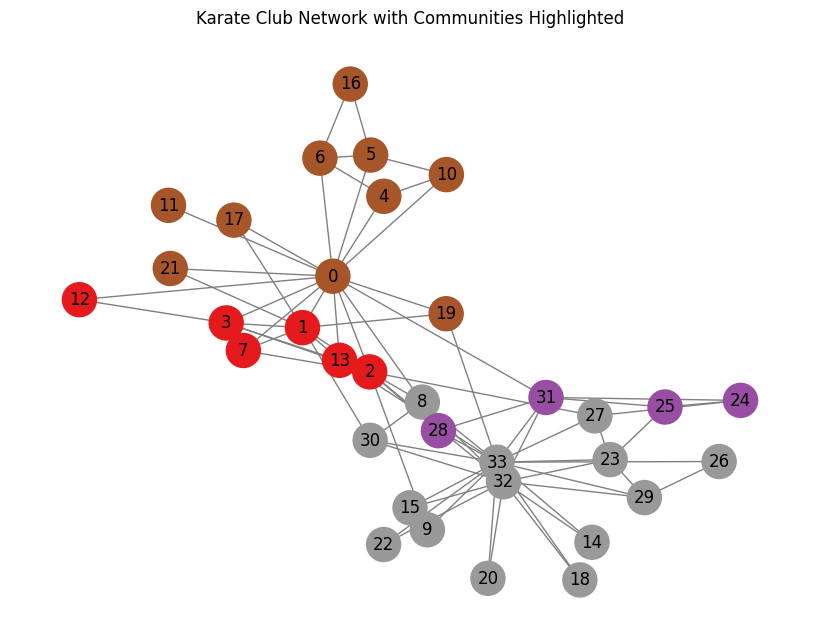

In [29]:
import networkx as nx
import matplotlib.pyplot as plt
from community import community_louvain 


G = nx.karate_club_graph()
partition = community_louvain.best_partition(G)
colors = [partition[node] for node in G.nodes]

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G, seed=42)  
nx.draw(
    G,
    pos,
    node_color=colors,
    with_labels=True,
    cmap=plt.cm.Set1,  # Choose a colormap for distinct colors
    node_size=600,
    edge_color="gray",
)
plt.title("Karate Club Network with Communities Highlighted")
plt.show()


## 3. Girvan-Newman clustering

Our task in this part will be to implement the Girvan-Newman clustering algorithm. Since NetworkX can do the heavy lifting for us -- computing betweenness centrality -- the code part of the task is relatively straightforward. Most of our effort here is spent interpreting and explaining intermediate results.

Recall from the text the Girvan-Newman clustering algorithm:

1. Create a partition sequence.
  1. Calculate the betweenness centrality for all links.
  2. Remove the link with largest betweenness and create a partition using connected components.
  3. Recalculate the betweenness centrality of the links of the resulting graph.
  4. Repeat from step B until no links remain.
2. Evaluate each partition in the sequence and choose the one with the highest modularity.

During this process, the number of connected components in the graph will increase monotonically as clusters are broken up. Since we are removing one link at a time, the number of connected components can increase by at most one between steps in the sequence -- it's not possible for a single edge to connect more than two nodes, and thus components.

We hope that the resulting partition of the graph will approximate its underlying community structure. We'll use the Karate Club graph here because we know the ground-truth community labels and can compare the result obtained from the algorithm.

In [30]:
%% capture
!pip install networkx python-louvain matplotlib

UsageError: Cell magic `%%` not found.


### Seeing the graph nodes

Show the graph nodes of $K$.

In [32]:
import networkx as nx
K = nx.karate_club_graph()
print("Nodes of the Karate Club graph:")
print(K.nodes(data=True))  
print("\nDetails of node 19:")
K.nodes[19]

Nodes of the Karate Club graph:
[(0, {'club': 'Mr. Hi'}), (1, {'club': 'Mr. Hi'}), (2, {'club': 'Mr. Hi'}), (3, {'club': 'Mr. Hi'}), (4, {'club': 'Mr. Hi'}), (5, {'club': 'Mr. Hi'}), (6, {'club': 'Mr. Hi'}), (7, {'club': 'Mr. Hi'}), (8, {'club': 'Mr. Hi'}), (9, {'club': 'Officer'}), (10, {'club': 'Mr. Hi'}), (11, {'club': 'Mr. Hi'}), (12, {'club': 'Mr. Hi'}), (13, {'club': 'Mr. Hi'}), (14, {'club': 'Officer'}), (15, {'club': 'Officer'}), (16, {'club': 'Mr. Hi'}), (17, {'club': 'Mr. Hi'}), (18, {'club': 'Officer'}), (19, {'club': 'Mr. Hi'}), (20, {'club': 'Officer'}), (21, {'club': 'Mr. Hi'}), (22, {'club': 'Officer'}), (23, {'club': 'Officer'}), (24, {'club': 'Officer'}), (25, {'club': 'Officer'}), (26, {'club': 'Officer'}), (27, {'club': 'Officer'}), (28, {'club': 'Officer'}), (29, {'club': 'Officer'}), (30, {'club': 'Officer'}), (31, {'club': 'Officer'}), (32, {'club': 'Officer'}), (33, {'club': 'Officer'})]

Details of node 19:


{'club': 'Mr. Hi'}

### 3.1 Create a partition sequence
#### A. Betweenness Centrality

The **betweenness** of an edge $e$ is the fraction of shortest-paths that course through it.

$$c_B(e)=\sum _{i,j \in V}\frac{\sigma (i,j)|e}{\sigma (i,j)},$$

where $\sigma(i,j)$ is the total number of shortest paths and $\sigma (i,j)|e$ is the number of shortest paths that pass through edge $e$. In `networkx`, the function is `edge_betweenness_centrality(G)`. Below, we illustrate the function using Zachary's karate club $K$.

Calculate the betweenness centrality for all links.

10 Points

In [33]:
import networkx as nx
K = nx.karate_club_graph()
edge_betweenness = nx.edge_betweenness_centrality(K)
print("Edge Betweenness Centrality for all edges:")
for edge, centrality in edge_betweenness.items():
    print(f"Edge {edge}: {centrality:.4f}")


Edge Betweenness Centrality for all edges:
Edge (0, 1): 0.0253
Edge (0, 2): 0.0778
Edge (0, 3): 0.0205
Edge (0, 4): 0.0523
Edge (0, 5): 0.0781
Edge (0, 6): 0.0781
Edge (0, 7): 0.0228
Edge (0, 8): 0.0742
Edge (0, 10): 0.0523
Edge (0, 11): 0.0588
Edge (0, 12): 0.0465
Edge (0, 13): 0.0424
Edge (0, 17): 0.0401
Edge (0, 19): 0.0459
Edge (0, 21): 0.0401
Edge (0, 31): 0.1273
Edge (1, 2): 0.0232
Edge (1, 3): 0.0077
Edge (1, 7): 0.0074
Edge (1, 13): 0.0124
Edge (1, 17): 0.0187
Edge (1, 19): 0.0146
Edge (1, 21): 0.0187
Edge (1, 30): 0.0323
Edge (2, 3): 0.0224
Edge (2, 7): 0.0252
Edge (2, 8): 0.0092
Edge (2, 9): 0.0308
Edge (2, 13): 0.0076
Edge (2, 27): 0.0412
Edge (2, 28): 0.0228
Edge (2, 32): 0.0690
Edge (3, 7): 0.0034
Edge (3, 12): 0.0123
Edge (3, 13): 0.0149
Edge (4, 6): 0.0048
Edge (4, 10): 0.0030
Edge (5, 6): 0.0030
Edge (5, 10): 0.0048
Edge (5, 16): 0.0294
Edge (6, 16): 0.0294
Edge (8, 30): 0.0098
Edge (8, 32): 0.0304
Edge (8, 33): 0.0404
Edge (9, 33): 0.0296
Edge (13, 33): 0.0678
Edge (14

The resulting dictionary has edge tuples as the keys, and each associated value is the betweenness centrality of that edge. The algorithm to compute the edge betweenness of all edges in a graph costs about the same as calculating it for a single edge, so we'll make use of this dictionary with the computed values for every edge.

Once computed for all edges, we can easily get the associated betweenness for a single edge. For example, get the edge betweenness of the edge between nodes 0 and 1:

10 Points

In [34]:
dge_betweenness = nx.edge_betweenness_centrality(K)
edge = (0, 1)
betweenness_value = edge_betweenness[edge]

# Display the result
print(f"The betweenness centrality of edge {edge} is: {betweenness_value:.4f}")

The betweenness centrality of edge (0, 1) is: 0.0253


#### B. Remove the link with largest betweenness

Given this dictionary of betweenness values for each edge, we can make use of max function to give us the key in this dictionary with the greatest value.

5 Points

In [35]:
edge_to_remove = max(edge_betweenness, key=edge_betweenness.get)
print(f"Edge with the largest betweenness centrality: {edge_to_remove}, Value: {edge_betweenness[edge_to_remove]:.4f}")
K.remove_edge(*edge_to_remove)
print(f"Edges after removing {edge_to_remove}:")
print(K.edges)

Edge with the largest betweenness centrality: (0, 31), Value: 0.1273
Edges after removing (0, 31):
[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (9, 33), (13, 33), (14, 32), (14, 33), (15, 32), (15, 33), (18, 32), (18, 33), (19, 33), (20, 32), (20, 33), (22, 32), (22, 33), (23, 25), (23, 27), (23, 29), (23, 32), (23, 33), (24, 25), (24, 27), (24, 31), (25, 31), (26, 29), (26, 33), (27, 33), (28, 31), (28, 33), (29, 32), (29, 33), (30, 32), (30, 33), (31, 32), (31, 33), (32, 33)]


This is then the edge we want to remove at this step in the next process.

####  C. Recalculate the betweenness centrality of the links of the resulting graph, & D. Repeat from step B until no links remain

This implies that we need a loop to repeat this process $L$ times, once for each edge, and that we should keep track of the partitions generated. Straightforward stuff. We'll start with a fresh Karate Club graph since we removed some edges above:

5 Points

In [36]:
partitions = []
while K.number_of_edges() > 0:
    edge_betweenness = nx.edge_betweenness_centrality(K)
    edge_to_remove = max(edge_betweenness, key=edge_betweenness.get)
    K.remove_edge(*edge_to_remove)
    components = [list(c) for c in nx.connected_components(K)]
    partitions.append(components)
    print(f"Removed edge: {edge_to_remove}, Remaining edges: {K.number_of_edges()}")
    print(f"Current partitions: {components}")

# Step 4: Display the evolution of partitions
print("\nFinal sequence of partitions:")
for i, partition in enumerate(partitions):
    print(f"Step {i+1}: {partition}")

Removed edge: (0, 2), Remaining edges: 76
Current partitions: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
Removed edge: (0, 8), Remaining edges: 75
Current partitions: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
Removed edge: (13, 33), Remaining edges: 74
Current partitions: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
Removed edge: (19, 33), Remaining edges: 73
Current partitions: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
Removed edge: (2, 32), Remaining edges: 72
Current partitions: [[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
Removed edge: (1, 30), Remaining edges: 

### Evaluate the modularity of each partition in the sequence

We now have a sequence of partitions and a function to calculate the modularity of a partition. This is a great time to use a list comprehension!

10 Points

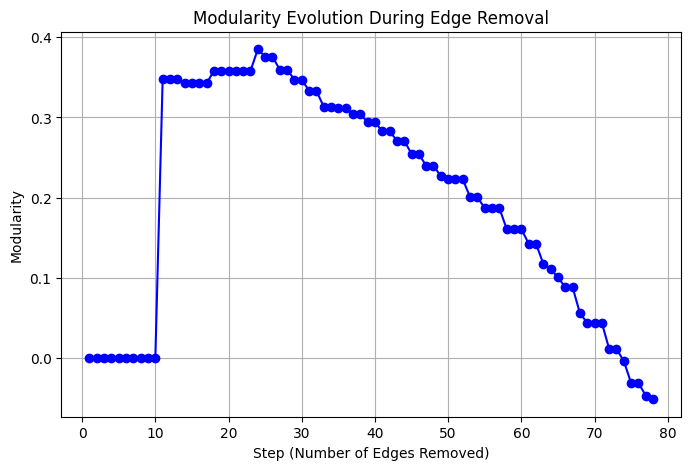

Best partition found at step 24 with modularity 0.3850
Best Partition: [[0, 1, 3, 7, 11, 12, 13, 17, 19, 21], [2, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16], [32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30], [9]]


In [40]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import modularity

K = nx.karate_club_graph()
partitions = []
while K.number_of_edges() > 0:
    edge_betweenness = nx.edge_betweenness_centrality(K)
    edge_to_remove = max(edge_betweenness, key=edge_betweenness.get)
    K.remove_edge(*edge_to_remove)
    partitions.append([list(c) for c in nx.connected_components(K)])
modularities = [modularity(nx.karate_club_graph(), partition) for partition in partitions]


plt.figure(figsize=(8, 5))
plt.plot(range(1, len(modularities) + 1), modularities, marker="o", linestyle="-", color="b")
plt.xlabel("Step (Number of Edges Removed)")
plt.ylabel("Modularity")
plt.title("Modularity Evolution During Edge Removal")
plt.grid(True)
plt.show()

best_partition_idx = modularities.index(max(modularities))
best_partition = partitions[best_partition_idx]

print(f"Best partition found at step {best_partition_idx+1} with modularity {max(modularities):.4f}")
print("Best Partition:", best_partition)


Get the partition with highest modularity:

5 Points

In [41]:
best_partition_idx = modularities.index(max(modularities))
best_partition = partitions[best_partition_idx]

print(f"Best partition found at step {best_partition_idx+1} with modularity {max(modularities):.4f}")
print("Best Partition:", best_partition)

Best partition found at step 24 with modularity 0.3850
Best Partition: [[0, 1, 3, 7, 11, 12, 13, 17, 19, 21], [2, 24, 25, 27, 28, 31], [4, 5, 6, 10, 16], [32, 33, 8, 14, 15, 18, 20, 22, 23, 26, 29, 30], [9]]


The partition of the karate club graph with highest modularity actually has five components! Visualize them.

5 Points

C:\Users\Asus\AppData\Local\Temp\ipykernel_33008\2631761185.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("tab10")  # Use a colormap with distinct colors


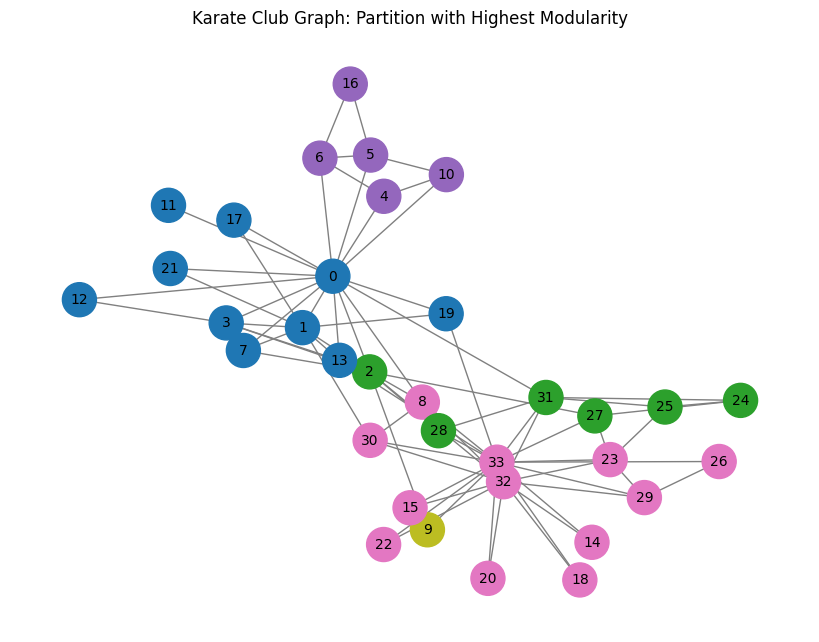

In [42]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

best_partition_idx = modularities.index(max(modularities))
best_partition = partitions[best_partition_idx]
community_colors = {}
cmap = get_cmap("tab10") 
for i, community in enumerate(best_partition):
    for node in community:
        community_colors[node] = cmap(i / len(best_partition))  

K = nx.karate_club_graph()  
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(K, seed=42)  

nx.draw(
    K,
    pos,
    node_color=[community_colors[node] for node in K.nodes],
    with_labels=True,
    node_size=600,
    edge_color="gray",
    font_size=10
)

plt.title("Karate Club Graph: Partition with Highest Modularity")
plt.show()


It's higher than the "ground truth" communities we evaluated in section 3, which is a good sign, but for the specific problem of trying to predict the post-split community membership, a clustering into five groups is useless to us.

#### Get the best partition with a given number of communities

One of the most useful parts of the Girvan-Newman algorithm is that it is also useful when we have a specific number of clusters we want. In this case, we know the karate club split into two groups, so let's get the partition in the sequence with two components:

10 Points

Partition with two communities (Step 11):
[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21], [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]
Modularity: 0.3477


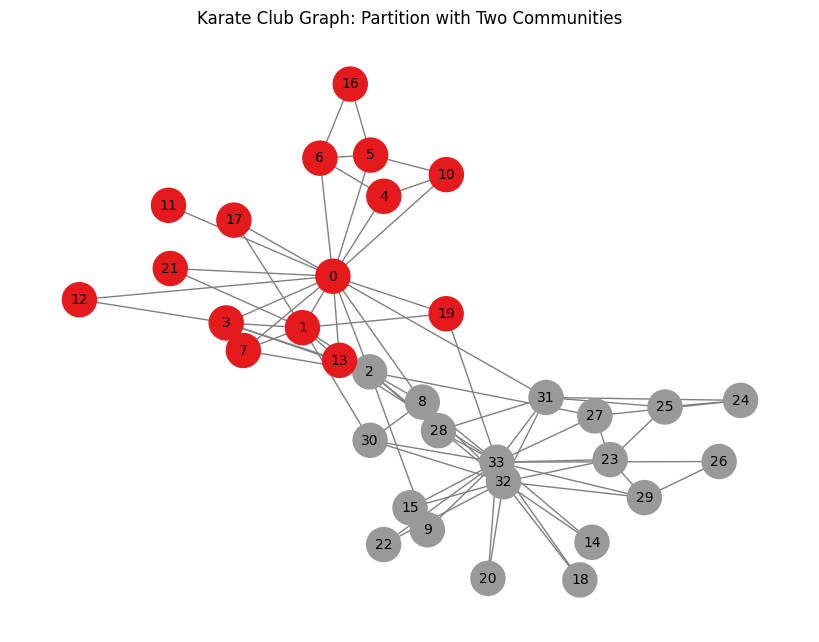

In [43]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import modularity

partition_with_two_communities = None
modularity_for_two_communities = None

for i, partition in enumerate(partitions):
    if len(partition) == 2:  #
        partition_with_two_communities = partition
        modularity_for_two_communities = modularities[i]
        break
print(f"Partition with two communities (Step {i+1}):")
print(partition_with_two_communities)
print(f"Modularity: {modularity_for_two_communities:.4f}")
K = nx.karate_club_graph()
community_colors = {}
for j, community in enumerate(partition_with_two_communities):
    for node in community:
        community_colors[node] = j

plt.figure(figsize=(8, 6))
pos = nx.spring_layout(K, seed=42)  
nx.draw(
    K,
    pos,
    node_color=[community_colors[node] for node in K.nodes],
    with_labels=True,
    cmap=plt.cm.Set1,
    node_size=600,
    edge_color="gray",
    font_size=10
)

plt.title("Karate Club Graph: Partition with Two Communities")
plt.show()


Compare to the ground truth community labels:

10 Points

In [44]:
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score
import networkx as nx

G = nx.karate_club_graph()
ground_truth = [0 if G.nodes[node]["club"] == "Mr. Hi" else 1 for node in G.nodes]
node_labels = {}
for community_idx, community in enumerate(partition_with_two_communities):
    for node in community:
        node_labels[node] = community_idx
predicted_labels = [node_labels[node] for node in G.nodes]
ari = adjusted_rand_score(ground_truth, predicted_labels)
nmi = normalized_mutual_info_score(ground_truth, predicted_labels)
print("Adjusted Rand Index (ARI):", round(ari, 4))
print("Normalized Mutual Information (NMI):", round(nmi, 4))


Adjusted Rand Index (ARI): 0.7717
Normalized Mutual Information (NMI): 0.7324


### 4. Marvel Universe Network

In [45]:
 !pip install powerlaw
 !pip install python-louvain


[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
import csv
import networkx as nx
import numpy as np
import community
import powerlaw
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import operator
import collections
import sys
from tqdm import tqdm
import random

You can download this dataset from this  [link](https://github.com/arangodb/example-datasets/blob/master/Graphs/Marvel%20Universe/hero-comic-network.csv).

#### Read the Dataset

In [25]:
file_path = "hero-comic-network.csv"  
data = pd.read_csv(file_path, header=None, names=["Hero Name", "Comic Name"])
data.head(20)

Hero Name Comic Name
0        FROST, CARMILLA     AA2 35
1   KILLRAVEN/JONATHAN R     AA2 35
2               M'SHULLA     AA2 35
3   24-HOUR MAN/EMMANUEL     AA2 35
4              OLD SKULL     AA2 35
5                 G'RATH     AA2 35
6   3-D MAN/CHARLES CHAN   M/PRM 35
7   3-D MAN/CHARLES CHAN   M/PRM 36
8   3-D MAN/CHARLES CHAN   M/PRM 37
9            HUMAN ROBOT      WI? 9
10  MARVEL BOY III/ROBER      WI? 9
11           GORILLA-MAN      WI? 9
12  3-D MAN/CHARLES CHAN      WI? 9
13              VENUS II      WI? 9
14           HUMAN ROBOT      AVF 4
15           GORILLA-MAN      AVF 4
16  JONES, RICHARD MILHO      AVF 4
17  3-D MAN/CHARLES CHAN      AVF 4
18  WASP/JANET VAN DYNE       AVF 4
19   LIBRA/GUSTAV BRANDT      AVF 4

#### Find and plot the community in the Marvel Dataset

#### Create graph
10 Points

In [27]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms.community import girvan_newman

G = nx.from_pandas_edgelist(data, source="Hero Name", target="Comic Name")

# Step 3: Detect Communities Using Girvan-Newman
communities_generator = girvan_newman(G)
top_level_communities = next(communities_generator)  # First split
sorted_communities = sorted(map(sorted, top_level_communities))

# Print the detected communities
print("\nDetected Communities:")
for i, community in enumerate(sorted_communities):
    print(f"Community {i + 1}: {community}")

# Step 4: Assign Colors to Communities
# Create a mapping of nodes to communities
node_to_community = {}
for community_index, community in enumerate(sorted_communities):
    for node in community:
        node_to_community[node] = community_index

# Assign a color to each node based on its community
colors = [node_to_community[node] for node in G.nodes]

# Step 5: Plot the Graph with Community Colors
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Use spring layout for better visualization
nx.draw(
    G,
    pos,
    with_labels=False,
    node_size=50,
    node_color=colors,
    cmap=plt.cm.rainbow,  # Use a colormap for communities
    edge_color="gray",
)
plt.title("Communities in the Marvel Dataset (Girvan-Newman)")
plt.colorbar(plt.cm.ScalarMappable(cmap=plt.cm.rainbow), label="Community")
plt.show()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Asus\AppData\Local\Temp\ipykernel_16876\3959317251.py", line 10, in <module>
    top_level_communities = next(communities_generator)  # First split
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\algorithms\community\centrality.py", line 148, in girvan_newman
    yield _without_most_central_edges(g, most_valuable_edge)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\algorithms\community\centrality.py", line 167, in _without_most_central_edges
    edge = most_valuable_edge(G)
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\networkx\algorithms\community\centrality.py", line 139, in most_valuable_edge
    betweenness = nx.edge_betweennes

#### Find the partition with community Louvain function

5 Points

In [28]:
import community as community_louvain
from collections import defaultdict
partition = community_louvain.best_partition(G)
community_groups = defaultdict(list)
for node, community in partition.items():
    community_groups[community].append(node)
print("\nDetected Communities:")
for community_id, nodes in community_groups.items():
    print(f"Community {community_id}: {nodes}")
    
colors = [partition[node] for node in G.nodes]


fig = plt.figure(figsize=(12, 8))
nx.draw(
    G,
    pos,
    with_labels=False,
    node_size=50,
    node_color=colors,
    cmap=plt.cm.rainbow,
    edge_color="gray",
)
plt.title("Communities in the Marvel Dataset (Louvain Modularity)")
plt.show()
fig.save('Louvain Partition')



Detected Communities:
Community 0: ['FROST, CARMILLA', 'AA2 35', 'KILLRAVEN/JONATHAN R', "M'SHULLA", '24-HOUR MAN/EMMANUEL', 'OLD SKULL', "G'RATH", 'ABRAXAS', 'GROK', 'AA2 22', 'SABRE', 'MINT JULEP', 'AA2 23', 'RATTACK', 'HIGH OVERLORD', 'AA2 24', 'AA2 27', 'VOLCANA ASH', 'EVE 3,031', 'ADAM 3,031', 'ATALON', 'SKAR', 'AA2 28', 'MELONIE', 'FOROPULIST', 'SACRIFICER', 'AA2 29', 'AA2 31', 'AA2 18', 'WARLORD', 'DEATHRAVEN/JOSHUA RA', 'AA2 34', 'AA2 21', 'AA2 25', 'AA2 26', 'VIGILANT/PSTUN-RAGE', 'AA2 32', 'AA2 33', 'AA2 36', 'AA2 37', 'WARR', 'BROTHER AXE', 'AA2 39', 'MOURNING PREY', 'MILLER, JENETTE', 'M/GN 7', 'AA2 19', 'KEMPLETON, PROFESSOR', 'SKARLET', 'MASTER TWELVE', 'ARROW', 'AA2 30', 'AA2 20', 'MASTER FOUR', 'AA2 38']
Community 1: ['3-D MAN/CHARLES CHAN', 'M/PRM 35', 'M/PRM 36', 'M/PRM 37', 'HUMAN ROBOT', 'WI? 9', 'GORILLA-MAN', 'VENUS II', 'AVF 4', 'WASP/JANET VAN DYNE ', 'LIBRA/GUSTAV BRANDT', 'CAPTAIN AMERICA', 'HAWK', 'ANT-MAN/DR. HENRY J.', 'AVF 5', 'PHARAOH RAMA-TUT', 'DARKSTA

NameError: name 'pos' is not defined

<Figure size 1200x800 with 0 Axes>

#### Visualize the Network Using NetworkX and save the figure

10 Points

## **Bonus: Spectral Clustering**

## **Fundamental Question**: Why do we use Graphs for clustering ?

> Enter your answer here (5 Points):
Graphs provide a powerful framework for clustering because they naturally model relationships between entities, making them highly effective for grouping similar elements based on connectivity and structure.
Graphs capture intricate relationships between data points, making them suitable for clustering in domains where connectivity is important.
Unlike traditional clustering methods that rely solely on geometric distances, graph-based clustering considers both the topological structure and node properties to determine similarity.
Graph-based clustering can incorporate various similarity measures, such as node proximity, edge weights, or shared neighbors, allowing for more meaningful groupings.
Graph data models enable efficient storage and processing of large-scale, highly interlinked datasets, providing scalability and high query performance compared to traditional methods.


Based on these websites:
https://link.springer.com/article/10.1007/s44163-024-00102-x#:~:text=Abstract,discussed%20the%20taxonomy%20in%20detail.

https://memgraph.com/blog/graph-clustering-algorithms-usage-comparison#:~:text=Recommendation%20Systems:%20Recommender%20systems%20are,accounts%20and%20receive%20relevant%20ads.

##  Graph Clustering Formulation and Notation
---
* Consider $n$ data points, $\mathcal{D}=\{ x_i\}_{i=1}^n$, and a **similarity measure** $w(x_i, x_j) = w_{ij} \geq 0$
* **Goal**: divide the data into $k$ groups or clusters such that points in the same group are similar and points in different groups are dissimilar to each other.
* Let $G=(V,E)$ be an *undirected* graph with vertex set $V=\{v_1, ..., v_n\}$
    * The vertex $v_i$ in the graph represents the data point $x_i$

#### Similarity Graph
---
The goal is to build a graph based on what we described. There are 3 types of similarity graph that we can build:

* *$\epsilon$-neighborhood graph* - we connect all points whose pairwise distances are smaller than $\epsilon$. As the distances between all connected points are roughly of the same scale, weighting the edges would not incorporate more information about the data to the graph. Hence, the $\epsilon$-neighborhood graph is usually considered as an **unweighted** /graph.

* KNN graph - Here we use $K$-Nearest Neighbors to connect vertex $v_i$ with vertex $v_j$ if $v_j$ is among the $K$-nearest neighbors of $v_i$.
    * A problem with that is that if the nearest neighbors are not symmetric, i.e. if there is a vertex $v_i$ which has $v_j$ as a nearest neighbor, it is not necessary that $v_i$ is a nearest neighbor of $v_j$. Thus, we end up getting a directed graph which is a problem as we do not know what similarity between 2 points means in that case. There are two ways of making this graph undirected:
        * Ignore the directions of the edges, i.e. we connect $v_i$ and $v_j$ with an undirected edge if $v_i$ is among the $K$-nearest neighbors of $v_j$ or if $v_j$ is among the $K$-nearest neighbors of $v_i$ . The resulting graph is what is usually called the $K$-nearest neighbor graph.
        * Connect vertices $v_i$ and $v_j$ if both $v_i$ is among the $K$-nearest neighbors of $v_j$ and $v_j$ is among the $K$-nearest neighbors of $v_i$ . The resulting graph is called the *mutual* $K$-nearest neighbor graph.

* Fully connected graph - we connect all points with each other, and we weight all edges by similarity $s_{ij}$. This graph should model the local neighborhood relationships, thus similarity functions such as Gaussian similarity function are used.

#### Graph Laplacians
---
We define 2 types of graph Laplacians:
1. The **unnormalized** graph Laplacian matrix: $$ L=D-W $$
2. The **normalized** graph Laplacian matrix:
    * **Symmetric** version: $$ L_{sym} = D^{-\frac{1}{2}}LD^{-\frac{1}{2}} $$
    * **Random Walk** version: $$ L_{rw} = D^{-1}L = I - D^{-1}W $$

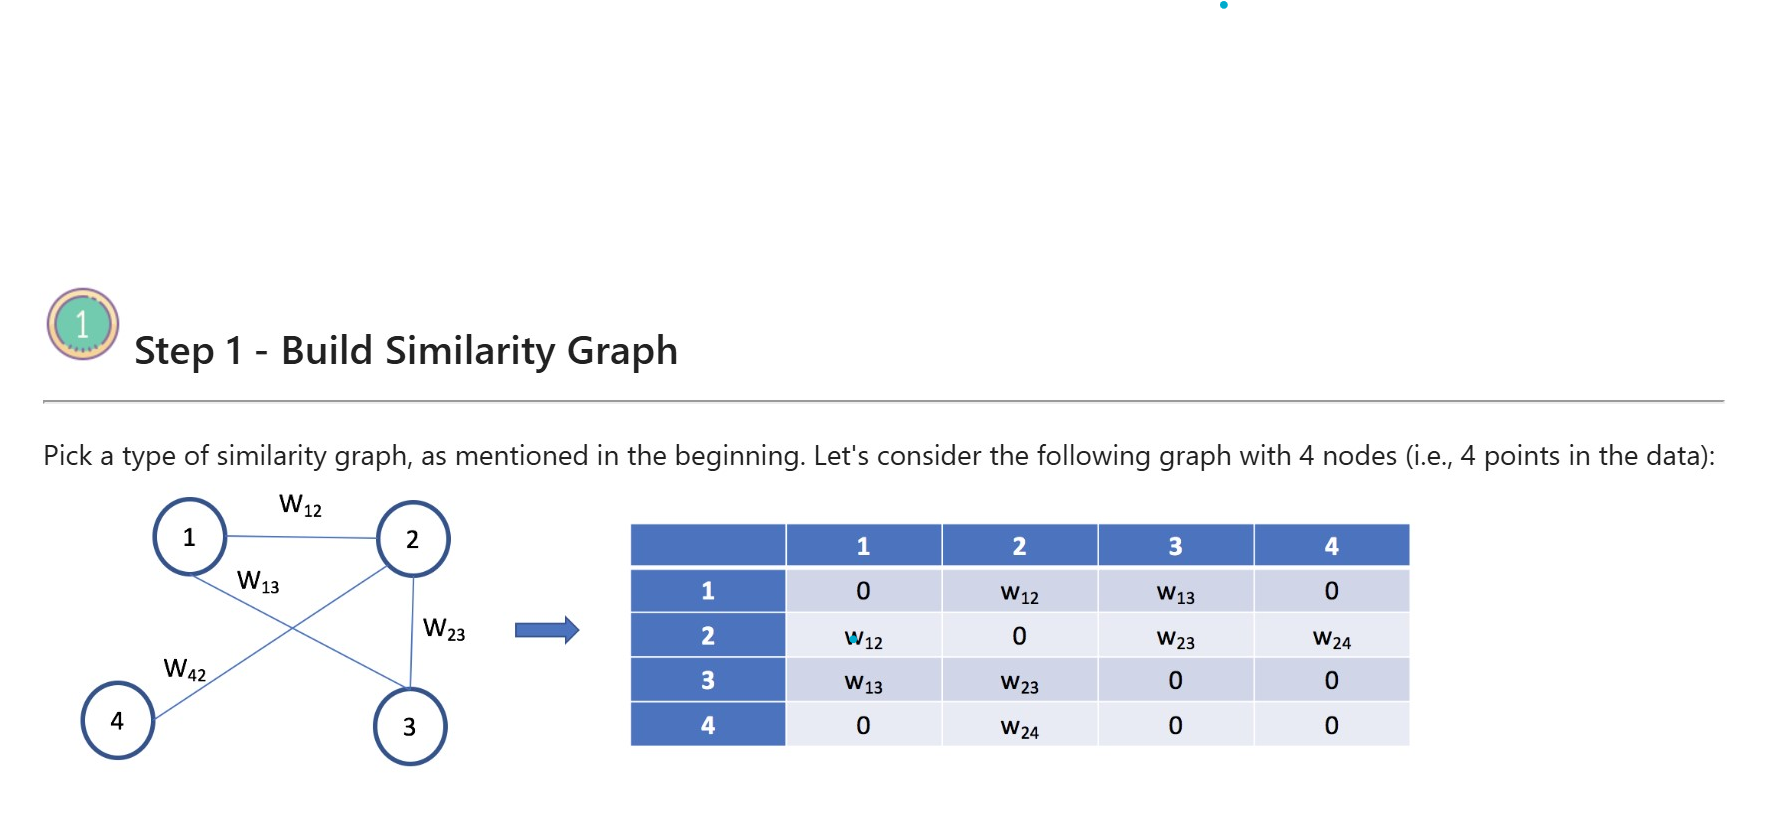

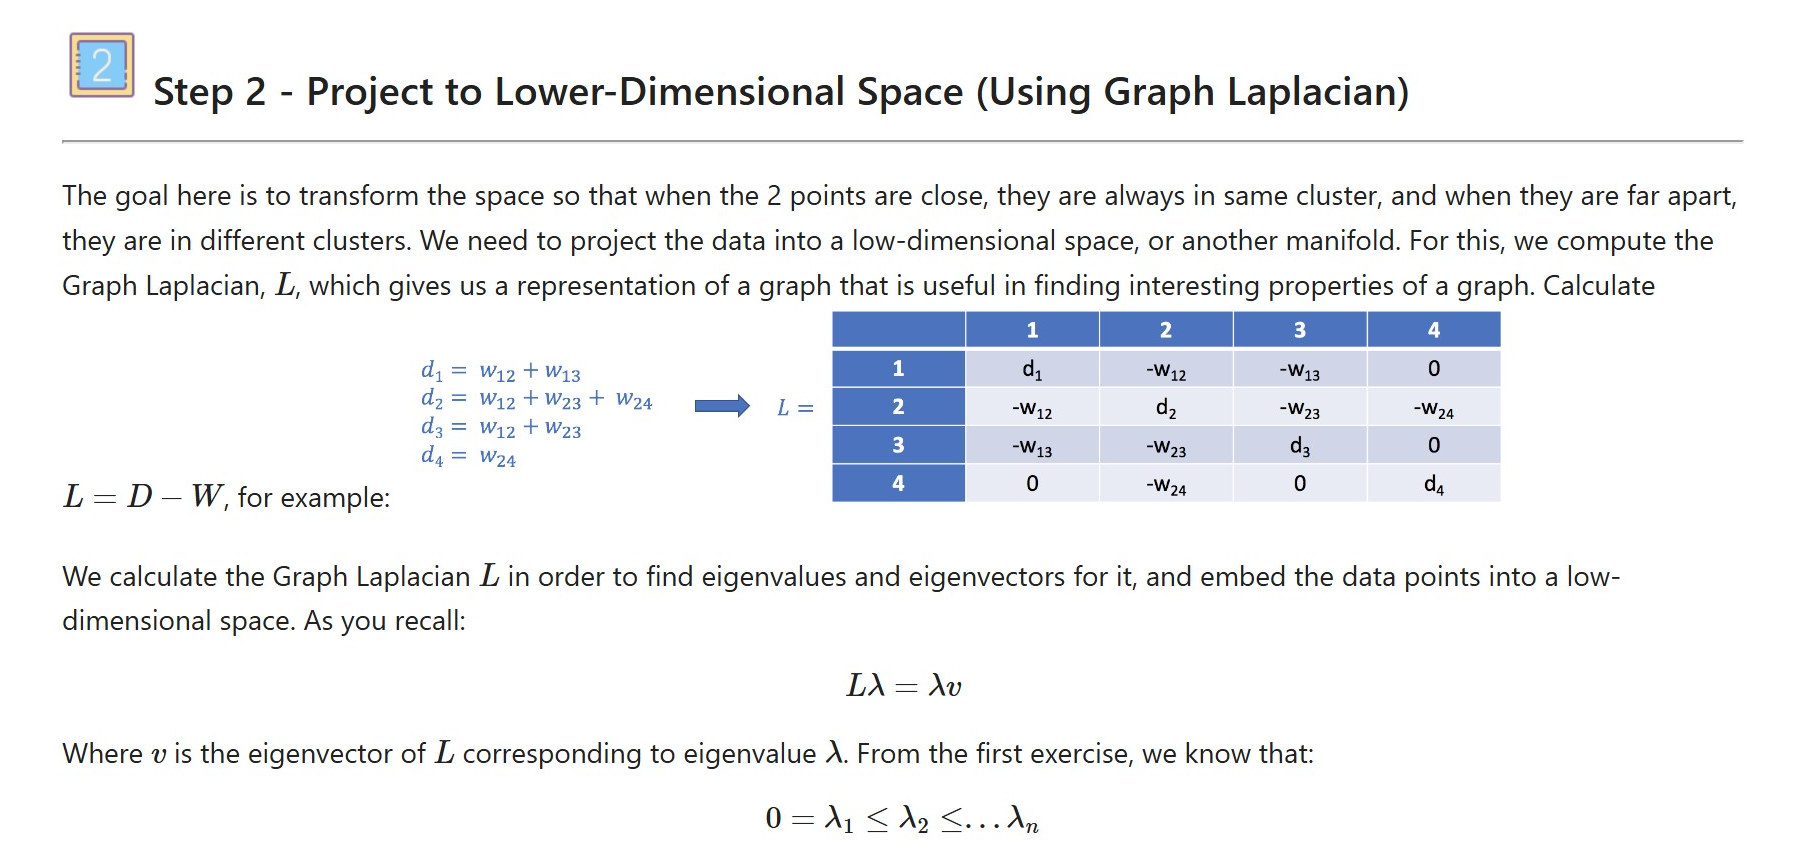

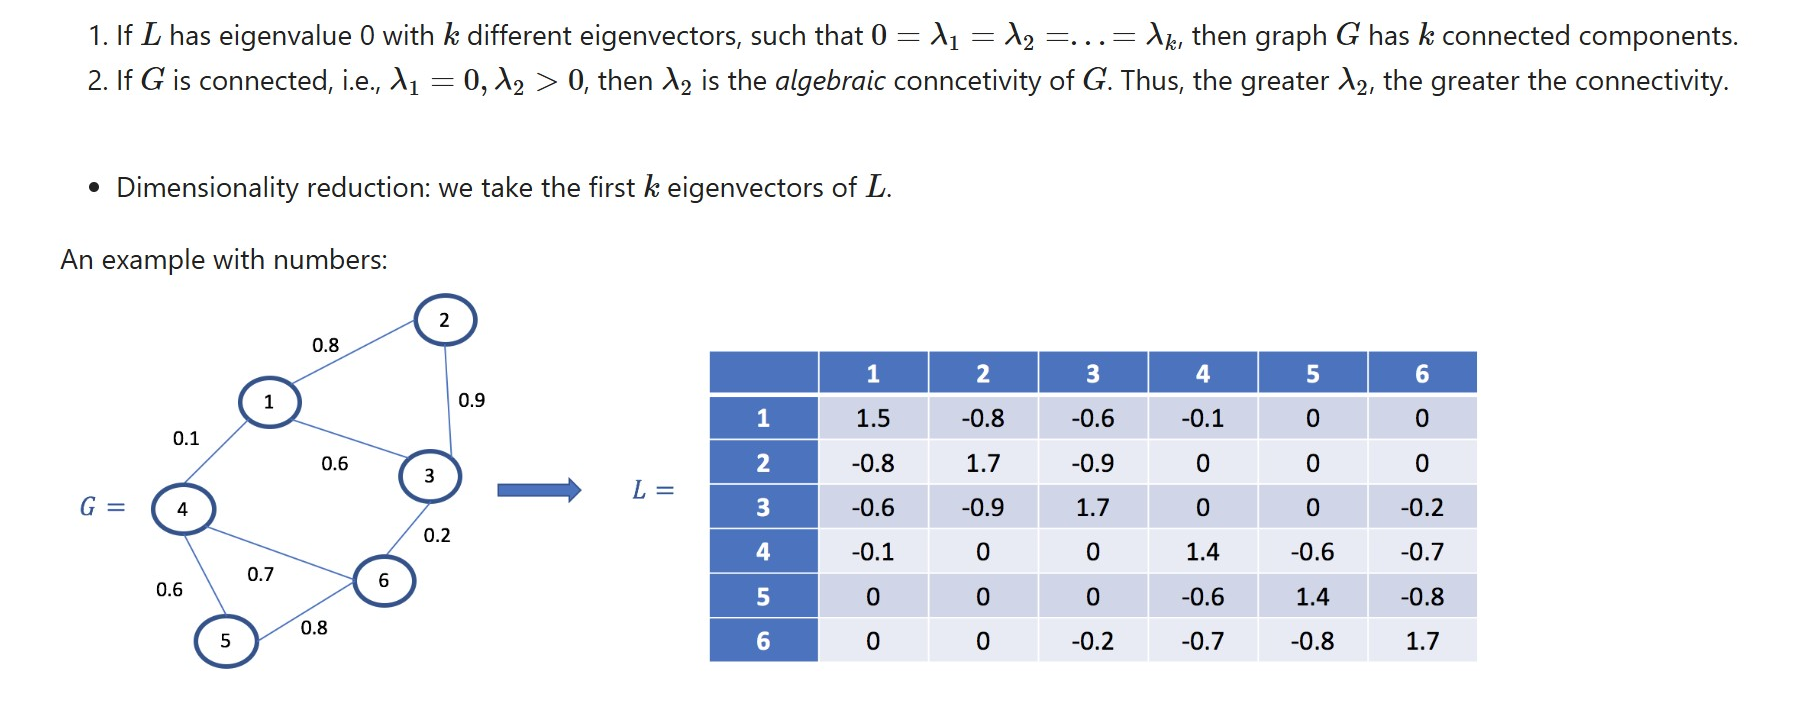

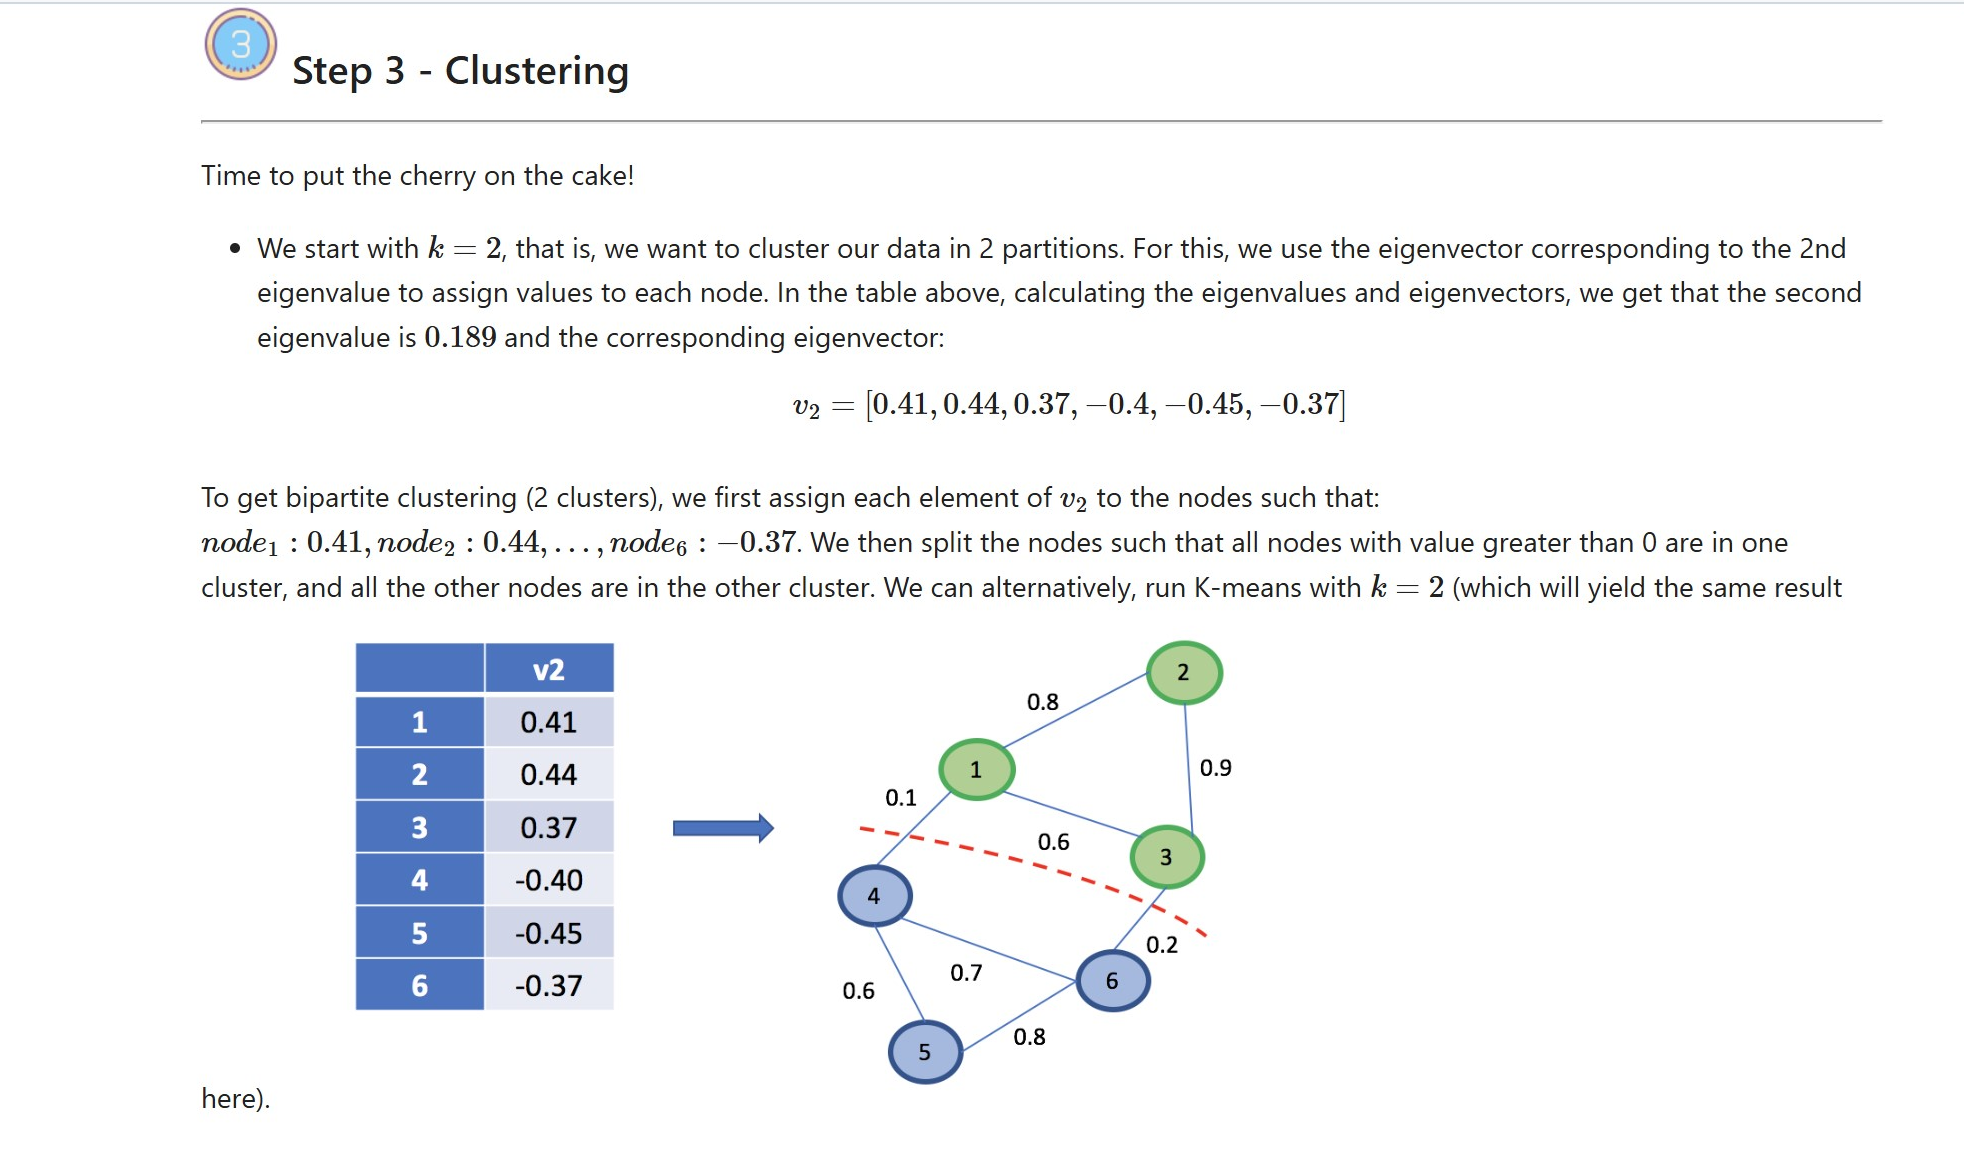

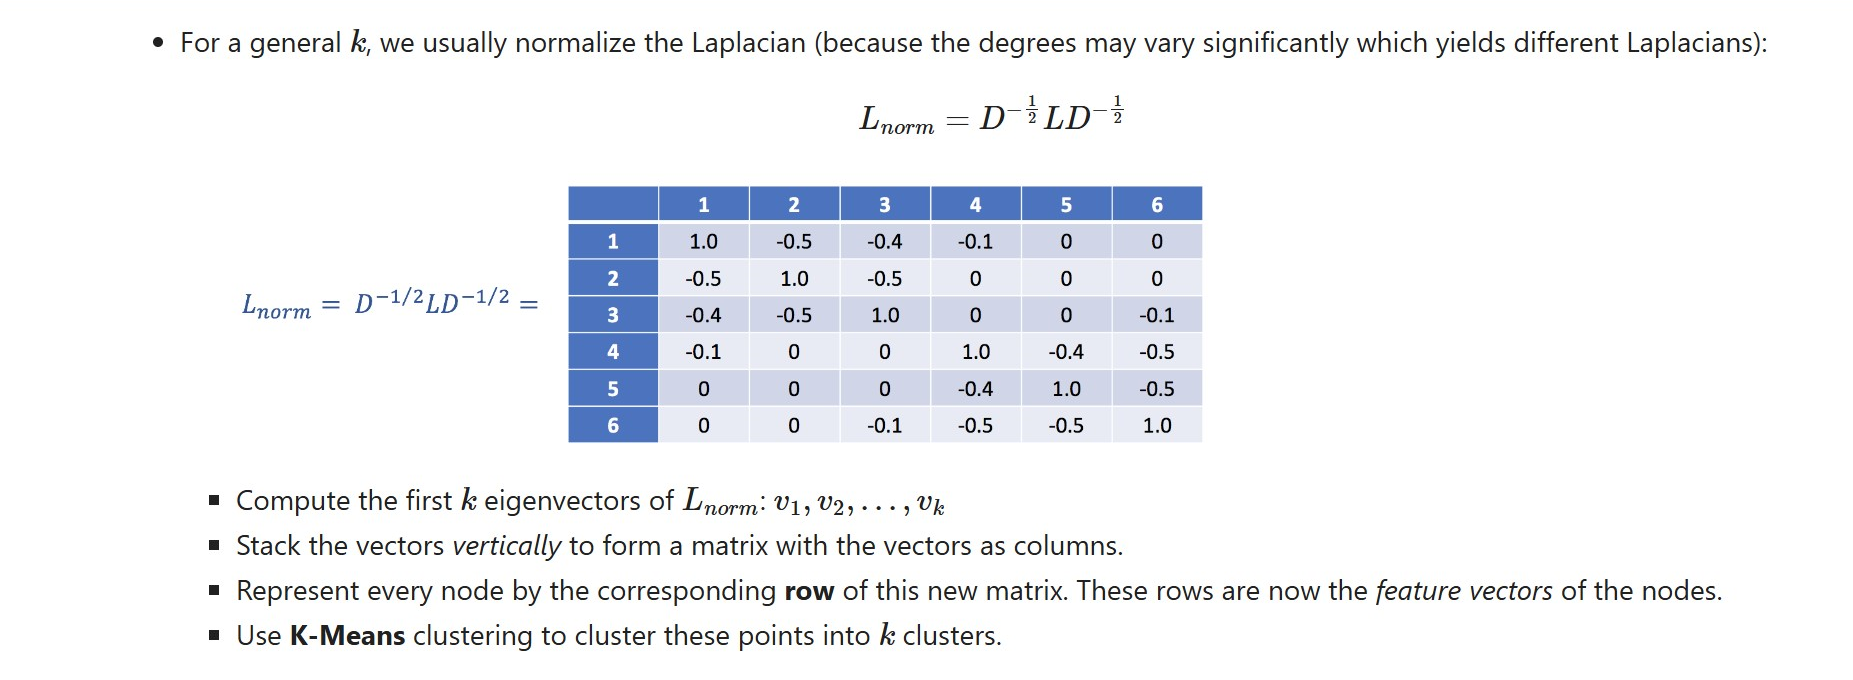

### Implement Spectral Clustering and Compare It to K-Means

#### Apply Spectral Clustering and compare its performance with K-Means on the provided dataset.

*Hint* : you can use the Moons dataset from `scikit-learn`.

10 Points

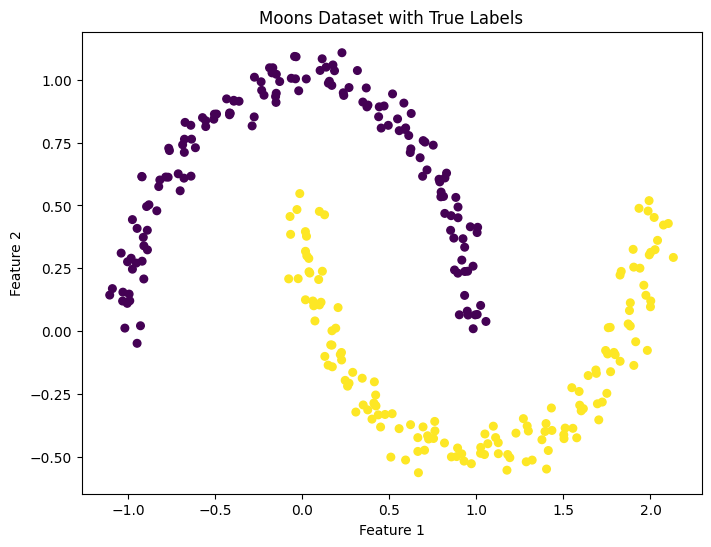

c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 501, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 966, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\Asus\AppData\Local\Programs\Python\Python310\lib\subproces

K-Means Adjusted Rand Index (ARI): 0.2475
Spectral Clustering Adjusted Rand Index (ARI): 1.0000


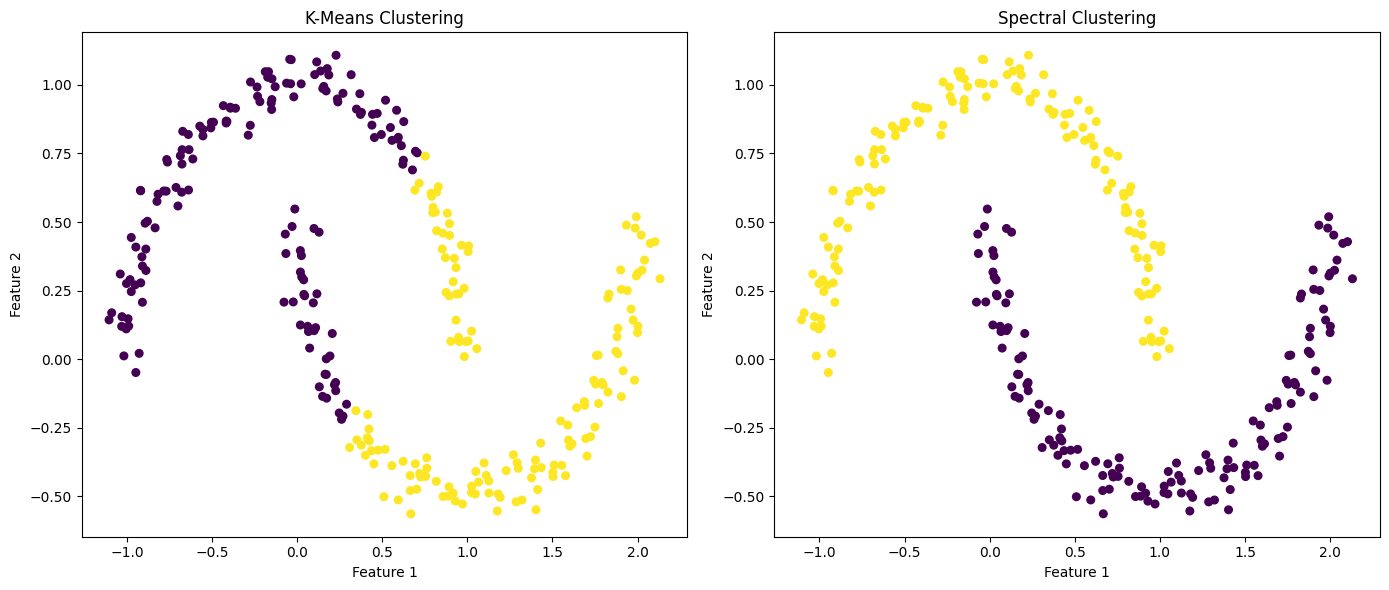

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import adjusted_rand_score


X, y_true = make_moons(n_samples=300, noise=0.05, random_state=42)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_true, cmap='viridis', s=30)
plt.title("Moons Dataset with True Labels")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)


spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors', random_state=42)
spectral_labels = spectral.fit_predict(X)
kmeans_ari = adjusted_rand_score(y_true, kmeans_labels)
spectral_ari = adjusted_rand_score(y_true, spectral_labels)

print(f"K-Means Adjusted Rand Index (ARI): {kmeans_ari:.4f}")
print(f"Spectral Clustering Adjusted Rand Index (ARI): {spectral_ari:.4f}")
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

axes[0].scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=30)
axes[0].set_title("K-Means Clustering")
axes[0].set_xlabel("Feature 1")
axes[0].set_ylabel("Feature 2")

axes[1].scatter(X[:, 0], X[:, 1], c=spectral_labels, cmap='viridis', s=30)
axes[1].set_title("Spectral Clustering")
axes[1].set_xlabel("Feature 1")
axes[1].set_ylabel("Feature 2")

plt.tight_layout()
plt.show()


#### Do this for Karate club

5 Points

K-Means Adjusted Rand Index (ARI): 0.0072
Spectral Clustering Adjusted Rand Index (ARI): 0.8823


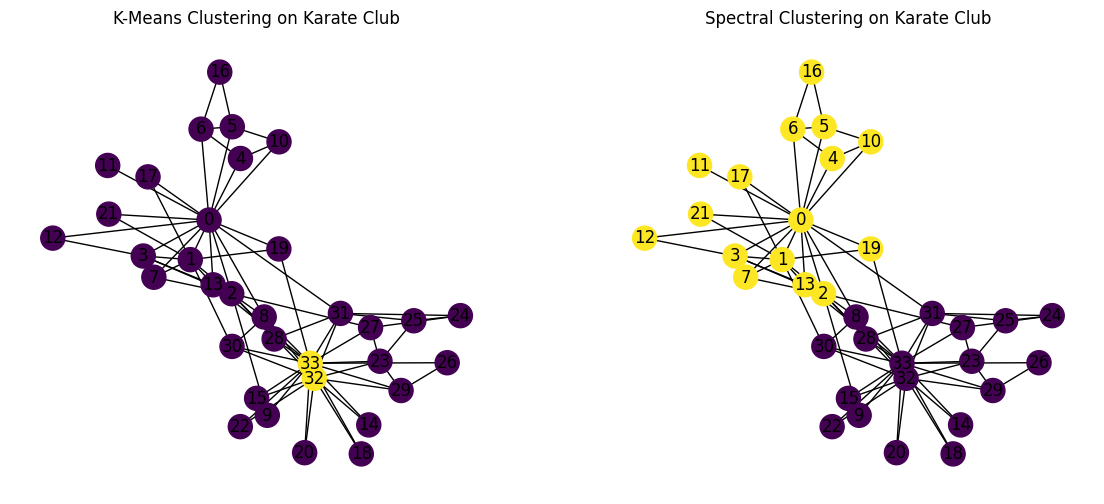

In [30]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering, KMeans
from sklearn.metrics import adjusted_rand_score


G = nx.karate_club_graph()
adj_matrix = nx.to_numpy_array(G)  
true_labels = np.array([G.nodes[i]['club'] == 'Mr. Hi' for i in range(len(G.nodes))], dtype=int)


kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(adj_matrix)

spectral = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)
spectral_labels = spectral.fit_predict(adj_matrix)

kmeans_ari = adjusted_rand_score(true_labels, kmeans_labels)
spectral_ari = adjusted_rand_score(true_labels, spectral_labels)

print(f"K-Means Adjusted Rand Index (ARI): {kmeans_ari:.4f}")
print(f"Spectral Clustering Adjusted Rand Index (ARI): {spectral_ari:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
pos = nx.spring_layout(G, seed=42)
nx.draw(G, pos, node_color=kmeans_labels, with_labels=True, node_size=300, cmap='viridis', ax=axes[0])
axes[0].set_title("K-Means Clustering on Karate Club")
nx.draw(G, pos, node_color=spectral_labels, with_labels=True, node_size=300, cmap='viridis', ax=axes[1])
axes[1].set_title("Spectral Clustering on Karate Club")
plt.show()


#### **Question**: What do you see in the output? Why?

> Enter your answer here (5 Points):
K-Means clusters most of the nodes into a single dominant group (purple).
A few nodes (e.g., 32, 33) are separated into another group (yellow).
The clusters do not align well with the network structure.
Spectral Clustering successfully separates the two main groups.
Nodes 0 and 33 are clearly dividing the two clusters, matching the original network structure.
K-Means assumes clusters are spherical and based on Euclidean distances.pectral Clustering uses graph connectivity rather than distance.